In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, RobustScaler,
    LabelEncoder, OneHotEncoder, OrdinalEncoder,
    PowerTransformer, QuantileTransformer
)
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


from sklearn.model_selection import (
    train_test_split, cross_val_score, cross_validate,
    StratifiedKFold, KFold, GridSearchCV, RandomizedSearchCV,
    validation_curve, learning_curve
)


from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier,
    GradientBoostingClassifier, AdaBoostClassifier,
    VotingClassifier, BaggingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet,
    SGDRegressor, BayesianRidge, HuberRegressor
)
from sklearn.ensemble import (
    RandomForestRegressor, ExtraTreesRegressor,
    GradientBoostingRegressor, AdaBoostRegressor,
    VotingRegressor, BaggingRegressor
)
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture


from sklearn.decomposition import PCA, TruncatedSVD, FastICA
from sklearn.manifold import TSNE
from sklearn.feature_selection import (
    SelectKBest, SelectFromModel, RFE, RFECV,
    chi2, f_classif, f_regression, mutual_info_classif
)


from sklearn.metrics import (
    # Clasificación
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, auc, log_loss,
    
    # Regresión
    mean_squared_error, mean_absolute_error, r2_score,
    mean_squared_log_error, mean_absolute_percentage_error, make_scorer,
    
    # Clustering
    silhouette_score, adjusted_rand_score, calinski_harabasz_score
)

try:
    import xgboost as xgb
    print("✅ XGBoost disponible")
except ImportError:
    print("❌ XGBoost no instalado")

try:
    import lightgbm as lgb
    print("✅ LightGBM disponible")
except ImportError:
    print("❌ LightGBM no instalado")

try:
    from catboost import CatBoostClassifier, CatBoostRegressor
    print("✅ CatBoost disponible")
except ImportError:
    print("❌ CatBoost no instalado")


try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
    print("✅ TensorFlow disponible")
except ImportError:
    print("❌ TensorFlow no instalado")

try:
    import torch
    import torch.nn as nn
    import torch.optim as optim
    print("✅ PyTorch disponible")
except ImportError:
    print("❌ PyTorch no instalado")


try:
    import spacy
    print("✅ SpaCy disponible")
except ImportError:
    print("❌ SpaCy no instalado")


try:
    import scipy.stats as stats
    from scipy import stats
    print("✅ SciPy disponible")
except ImportError:
    print("❌ SciPy no instalado")
from scipy.stats import uniform, randint

try:
    import statsmodels.api as sm
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print("✅ Statsmodels disponible")
except ImportError:
    print("❌ Statsmodels no instalado")


try:
    from prophet import Prophet
    print("✅ Prophet disponible")
except ImportError:
    print("❌ Prophet no instalado")


try:
    import optuna
    print("✅ Optuna disponible")
except ImportError:
    print("❌ Optuna no instalado")


import os
import sys
import json
import pickle
import joblib
from datetime import datetime, timedelta
import itertools
from collections import Counter
import gc


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.width', None)


plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12


sns.set_palette("husl")
sns.set_style("whitegrid")


np.random.seed(1722)


def info_basica(df):
    """Función para explorar un dataset rápidamente"""
    print("=" * 50)
    print("INFORMACIÓN BÁSICA DEL DATASET")
    print("=" * 50)
    print(f"Forma del dataset: {df.shape}")
    print(f"Memoria utilizada: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print("\nTipos de datos:")
    print(df.dtypes.value_counts())
    print("\nValores nulos:")
    print(df.isnull().sum().sort_values(ascending=False))
    print("\nValores duplicados:", df.duplicated().sum())
    print("\nPrimeras 5 filas:")
    print(df.head())



✅ XGBoost disponible
✅ LightGBM disponible
✅ CatBoost disponible
✅ TensorFlow disponible
✅ PyTorch disponible
✅ SpaCy disponible
✅ SciPy disponible
✅ Statsmodels disponible
✅ Prophet disponible
✅ Optuna disponible


In [3]:
train           = pd.read_csv(r"C:\Users\Pc\Desktop\kaggle\Store Sales - Time Series Forecasting/train.csv")
test            = pd.read_csv(r"C:\Users\Pc\Desktop\kaggle\Store Sales - Time Series Forecasting/test.csv")
holidays_events = pd.read_csv(r"C:\Users\Pc\Desktop\kaggle\Store Sales - Time Series Forecasting/holidays_events.csv")
oil             = pd.read_csv(r"C:\Users\Pc\Desktop\kaggle\Store Sales - Time Series Forecasting/oil.csv")
stores          = pd.read_csv(r"C:\Users\Pc\Desktop\kaggle\Store Sales - Time Series Forecasting/stores.csv")
transactions    = pd.read_csv(r"C:\Users\Pc\Desktop\kaggle\Store Sales - Time Series Forecasting/transactions.csv")

In [4]:
#                          train.csv mas de
#store_nbr# identifies the store at which the products are sold.
#family# identifies the type of product sold.
#sales# gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
#onpromotion# gives the total number of items in a product family that were being promoted at a store at a given date.

#                          test.csv predecir 15 dias "sales"

#                          store.csv metada
#city#
#state#
#type#
#cluster#

#                          oil.csv 
#Includes values during both the train and test data timeframes.
#(Ecuador is an oil-dependent country and it's economical health is highly vulnerable to shocks in oil prices.)

#                          holidays_events.csv Holidays and Events metadata
#NOTE: Pay special attention to the transferred column.
#A holiday that is transferred officially falls on that calendar day, but was moved to another date by the government.
#A transferred day is more like a normal day than a holiday.
#To find the day that it was actually celebrated, look for the corresponding row where type is Transfer.
#For example, the holiday Independencia de Guayaquil was transferred from 2012-10-09 to 2012-10-12,
#which means it was celebrated on 2012-10-12.
#Days that are type Bridge are extra days that are added to a holiday (e.g., to extend the break across a long weekend).
#These are frequently made up by the type Work Day which is a day not normally scheduled for work (e.g., Saturday)
#that is meant to payback the Bridge
#Additional holidays are days added a regular calendar holiday, for example, as typically happens around Christmas (making Christmas Eve a holiday)

###Additional Notes###
#Wages in the public sector are paid every two weeks on the 15 th and on the last day of the month. Supermarket sales could be affected by this.
#A magnitude 7.8 earthquake struck Ecuador on April 16, 2016.
#People rallied in relief efforts donating water and other first need products which greatly affected supermarket sales
#for several weeks after the earthquake.




In [5]:
print(info_basica(train))
train.describe(include="all")
#33 Family / 54 store_nbr / 3kk/90k = 33 , family distribuido uniformemente
#store_nbr distrib uniforme 55572
#date 2013-01-01 a 2017-08-15
#cada dia se registran 1782 sales cada store vende los 33 family 33*54 =1782
#obviamente hay muchas ventas con "0" , xq registran tanto si vendieron o no esa family
#ver con atencion la relacion con el precio del petroleo, ver como afecta en el sueldo y las ventas
#analizar con atencion el comportamiento de los dias feriados y de los feriados transferido
#analizar con atencion el comportamiento de los findes de semana XXL
#Wages se pagan 2 veces por mes los 15 y el ultimo dia del mes # ver comportamiento bi-mensual
#luego del terremoto 2016-04-16 se deberia ver un comportamiento distinto por el evento en si y las repercusiones

# si quisiera hacer una DNN y pensar en distribuciones
# distrib por family
# distrib por store
# distrib store/family en cada store las ventas de cada familia es igual o hay dif ? ejemplo en la tienda a , el num_sold de automotive es el doble
# del de la tienda z
# para manejar los 0 seria bueno una distrib para ver si hay ventas o no ese dia para esa familia y esto es por familia o por store ? o ambas para 
# cada store y cada family
# para trabajar que seria mejor si veo que los 15 y fin de mes se compra mas hago una distribucion de eso o prefiero modelarlo como un multiplicativo ?
# lo de arriba hago tmb para feriados/xxl/transferidos ?
# respecto al precio del OIL , tambien lo uso como un multiplicativo ?

###teniendo esto en mente veo toda la info y decido como proceder

INFORMACIÓN BÁSICA DEL DATASET
Forma del dataset: (3000888, 6)
Memoria utilizada: 477.24 MB

Tipos de datos:
int64      3
object     2
float64    1
Name: count, dtype: int64

Valores nulos:
id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

Valores duplicados: 0

Primeras 5 filas:
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE 0.0000            0
1   1  2013-01-01          1   BABY CARE 0.0000            0
2   2  2013-01-01          1      BEAUTY 0.0000            0
3   3  2013-01-01          1   BEVERAGES 0.0000            0
4   4  2013-01-01          1       BOOKS 0.0000            0
None


,id,date,store_nbr,family,sales,onpromotion
count,3000888.0000,3000888,3000888.0000,3000888,3000888.0000,3000888.0000
unique,NaN,1684,NaN,33,NaN,NaN
top,NaN,2017-08-15,NaN,AUTOMOTIVE,NaN,NaN
freq,NaN,1782,NaN,90936,NaN,NaN
mean,1500443.5000,NaN,27.5000,NaN,357.7757,2.6028
std,866281.8916,NaN,15.5858,NaN,1101.9977,12.2189
min,0.0000,NaN,1.0000,NaN,0.0000,0.0000
25%,750221.7500,NaN,14.0000,NaN,0.0000,0.0000
50%,1500443.5000,NaN,27.5000,NaN,11.0000,0.0000
75%,2250665.2500,NaN,41.0000,NaN,195.8473,0.0000


In [6]:
#train["date"].value_counts()
#train["store_nbr"].value_counts()
train.head(10)

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0000,0
1,1,2013-01-01,1,BABY CARE,0.0000,0
2,2,2013-01-01,1,BEAUTY,0.0000,0
3,3,2013-01-01,1,BEVERAGES,0.0000,0
4,4,2013-01-01,1,BOOKS,0.0000,0
5,5,2013-01-01,1,BREAD/BAKERY,0.0000,0
6,6,2013-01-01,1,CELEBRATION,0.0000,0
7,7,2013-01-01,1,CLEANING,0.0000,0
8,8,2013-01-01,1,DAIRY,0.0000,0
9,9,2013-01-01,1,DELI,0.0000,0


In [7]:
print(info_basica(test))
test.describe(include="all")
# predecir 15 dias de ventas

INFORMACIÓN BÁSICA DEL DATASET
Forma del dataset: (28512, 5)
Memoria utilizada: 4.32 MB

Tipos de datos:
int64     3
object    2
Name: count, dtype: int64

Valores nulos:
id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

Valores duplicados: 0

Primeras 5 filas:
        id        date  store_nbr      family  onpromotion
0  3000888  2017-08-16          1  AUTOMOTIVE            0
1  3000889  2017-08-16          1   BABY CARE            0
2  3000890  2017-08-16          1      BEAUTY            2
3  3000891  2017-08-16          1   BEVERAGES           20
4  3000892  2017-08-16          1       BOOKS            0
None


,id,date,store_nbr,family,onpromotion
count,28512.0000,28512,28512.0000,28512,28512.0000
unique,NaN,16,NaN,33,NaN
top,NaN,2017-08-16,NaN,AUTOMOTIVE,NaN
freq,NaN,1782,NaN,864,NaN
mean,3015143.5000,NaN,27.5000,NaN,6.9654
std,8230.8498,NaN,15.5861,NaN,20.6840
min,3000888.0000,NaN,1.0000,NaN,0.0000
25%,3008015.7500,NaN,14.0000,NaN,0.0000
50%,3015143.5000,NaN,27.5000,NaN,0.0000
75%,3022271.2500,NaN,41.0000,NaN,6.0000


In [8]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [9]:
print(info_basica(holidays_events))
holidays_events.describe(include="all")

INFORMACIÓN BÁSICA DEL DATASET
Forma del dataset: (350, 6)
Memoria utilizada: 0.11 MB

Tipos de datos:
object    5
bool      1
Name: count, dtype: int64

Valores nulos:
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

Valores duplicados: 0

Primeras 5 filas:
         date     type    locale locale_name                    description  \
0  2012-03-02  Holiday     Local       Manta             Fundacion de Manta   
1  2012-04-01  Holiday  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12  Holiday     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14  Holiday     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21  Holiday     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  
None


,date,type,locale,locale_name,description,transferred
count,350,350,350,350,350,350
unique,312,6,3,24,103,2
top,2014-06-25,Holiday,National,Ecuador,Carnaval,False
freq,4,221,174,174,10,338


In [10]:
#holidays_events.tail(10)
#holidays_events["type"].value_counts()
#holidays_events
"""type
Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
"""
#holidays_events["locale"].value_counts()
"""locale
National    174
Local       152
Regional     24
"""
#holidays_events["locale_name"].value_counts()
"""locale_name
Ecuador                           174
Quito                              13
Riobamba                           12
Guaranda                           12
Latacunga                          12
Ambato                             12
Guayaquil                          11
Cuenca                              7
Ibarra                              7
Salinas                             6
Loja                                6
Santa Elena                         6
Santo Domingo de los Tsachilas      6
Quevedo                             6
Manta                               6
Esmeraldas                          6
Cotopaxi                            6
El Carmen                           6
Santo Domingo                       6
Machala                             6
Imbabura                            6
Puyo                                6
Libertad                            6
Cayambe                             6
"""


'locale_name\nEcuador                           174\nQuito                              13\nRiobamba                           12\nGuaranda                           12\nLatacunga                          12\nAmbato                             12\nGuayaquil                          11\nCuenca                              7\nIbarra                              7\nSalinas                             6\nLoja                                6\nSanta Elena                         6\nSanto Domingo de los Tsachilas      6\nQuevedo                             6\nManta                               6\nEsmeraldas                          6\nCotopaxi                            6\nEl Carmen                           6\nSanto Domingo                       6\nMachala                             6\nImbabura                            6\nPuyo                                6\nLibertad                            6\nCayambe                             6\n'

In [11]:
print(info_basica(oil))
oil.describe(include="all")

INFORMACIÓN BÁSICA DEL DATASET
Forma del dataset: (1218, 2)
Memoria utilizada: 0.09 MB

Tipos de datos:
object     1
float64    1
Name: count, dtype: int64

Valores nulos:
dcoilwtico    43
date           0
dtype: int64

Valores duplicados: 0

Primeras 5 filas:
         date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02     93.1400
2  2013-01-03     92.9700
3  2013-01-04     93.1200
4  2013-01-07     93.2000
None


,date,dcoilwtico
count,1218,1175.0000
unique,1218,NaN
top,2017-08-31,NaN
freq,1,NaN
mean,NaN,67.7144
std,NaN,25.6305
min,NaN,26.1900
25%,NaN,46.4050
50%,NaN,53.1900
75%,NaN,95.6600


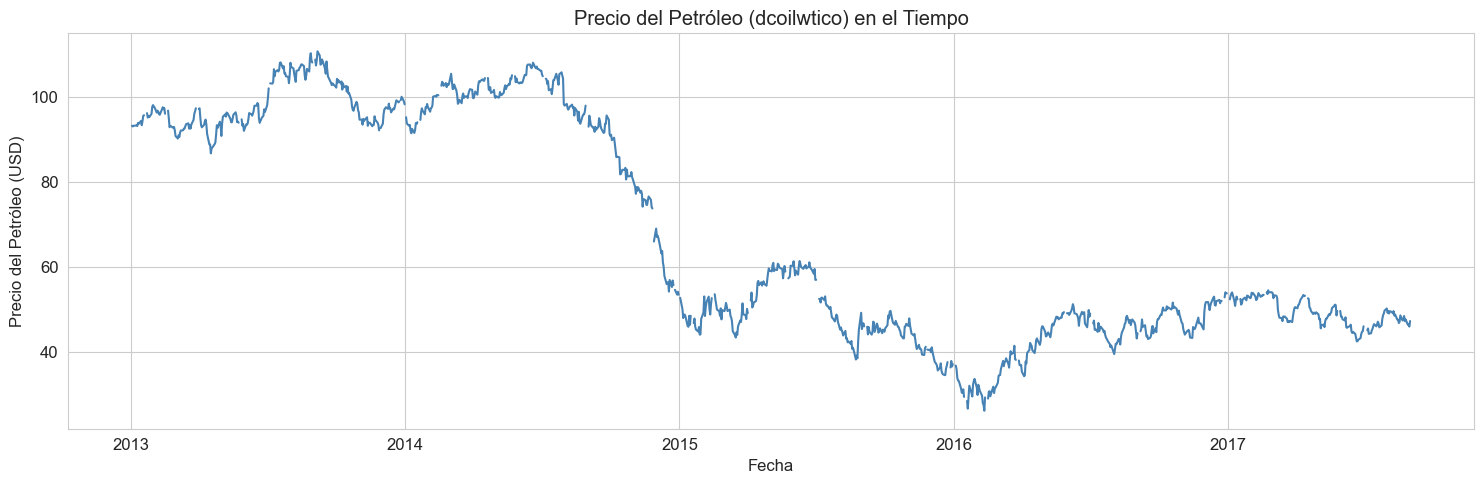

In [12]:
oil['date'] = pd.to_datetime(oil['date'])

plt.figure(figsize=(15, 5))
plt.plot(oil['date'], oil['dcoilwtico'], color='steelblue')
plt.title('Precio del Petróleo (dcoilwtico) en el Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio del Petróleo (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# ver de agregar la info del precio por fecha en train
# ver si separo por periodo con precio estable
# ver el comportamiento de los sueldos y el num_sold

In [13]:
print(info_basica(stores))
stores.describe(include="all")

INFORMACIÓN BÁSICA DEL DATASET
Forma del dataset: (54, 5)
Memoria utilizada: 0.01 MB

Tipos de datos:
object    3
int64     2
Name: count, dtype: int64

Valores nulos:
store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64

Valores duplicados: 0

Primeras 5 filas:
   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4
None


,store_nbr,city,state,type,cluster
count,54.0000,54,54,54,54.0000
unique,NaN,22,16,5,NaN
top,NaN,Quito,Pichincha,D,NaN
freq,NaN,18,19,18,NaN
mean,27.5000,NaN,NaN,NaN,8.4815
std,15.7321,NaN,NaN,NaN,4.6934
min,1.0000,NaN,NaN,NaN,1.0000
25%,14.2500,NaN,NaN,NaN,4.0000
50%,27.5000,NaN,NaN,NaN,8.5000
75%,40.7500,NaN,NaN,NaN,13.0000


In [14]:
stores.head(56)
# creo que agrego esta info como esta a train
# puedo hacer evaluaciones por ciudad/state/type/cluster
# seria mas manejable si el comportamiento de los stores fuera similar para los de cada ciudad o del "cluster"

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [15]:
print(info_basica(transactions))
transactions.describe(include="all")
# info agrupada por fechas veo como la trabajo


INFORMACIÓN BÁSICA DEL DATASET
Forma del dataset: (83488, 3)
Memoria utilizada: 6.61 MB

Tipos de datos:
int64     2
object    1
Name: count, dtype: int64

Valores nulos:
date            0
store_nbr       0
transactions    0
dtype: int64

Valores duplicados: 0

Primeras 5 filas:
         date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111
2  2013-01-02          2          2358
3  2013-01-02          3          3487
4  2013-01-02          4          1922
None


,date,store_nbr,transactions
count,83488,83488.0000,83488.0000
unique,1682,NaN,NaN
top,2017-07-29,NaN,NaN
freq,54,NaN,NaN
mean,NaN,26.9392,1694.6022
std,NaN,15.6082,963.2866
min,NaN,1.0000,5.0000
25%,NaN,13.0000,1046.0000
50%,NaN,27.0000,1393.0000
75%,NaN,40.0000,2079.0000


In [16]:
#agrego la info de oil/holidays_events a los dataset train y test "date"
#agrego la info de store a los dataset train y test "store_nbr"
# para oil que tiene datos faltantes 43 , los reemplazo con el ultimo valor

In [17]:
oil.tail()

,date,dcoilwtico
1213,2017-08-25,47.6500
1214,2017-08-28,46.4000
1215,2017-08-29,46.4600
1216,2017-08-30,45.9600
1217,2017-08-31,47.2600


In [18]:
# VERIFICAR COLUMNAS PARA EVITAR CONFLICTOS
print(f"\nColumnas en stores: {list(stores.columns)}")
print(f"Columnas en holidays_events: {list(holidays_events.columns)}")

# Verificar si hay conflicto de nombres
stores_cols = set(stores.columns)
holidays_cols = set(holidays_events.columns)
conflicting_cols = stores_cols.intersection(holidays_cols) - {'date'}  # Excluir 'date' que es normal
if conflicting_cols:
    print(f"⚠️ CONFLICTO: Columnas duplicadas entre stores y holidays: {conflicting_cols}")

# 2. Preparar fechas - convertir a datetime
print("\nPreparando fechas...")
train['date'] = pd.to_datetime(train['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])

# 3. Manejar valores faltantes en precio del petróleo
print(f"\nValores faltantes en oil antes: {oil['dcoilwtico'].isna().sum()}")

# Ordenar por fecha y usar forward fill (último valor válido)
oil = oil.sort_values('date')
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='ffill')

# Si aún quedan NaN al inicio, usar backward fill
oil['dcoilwtico'] = oil['dcoilwtico'].fillna(method='bfill')

print(f"Valores faltantes en oil después: {oil['dcoilwtico'].isna().sum()}")

# 4. Preparar holidays_events para join
print("\nPreparando holidays_events...")
print(f"Columnas en holidays_events: {list(holidays_events.columns)}")
print(f"Fechas en holidays: {holidays_events['date'].min()} a {holidays_events['date'].max()}")
print(f"Fechas en train: {train['date'].min()} a {train['date'].max()}")

# Verificar si hay overlap de fechas
overlap = holidays_events[holidays_events['date'].between(train['date'].min(), train['date'].max())]
print(f"Eventos que coinciden con período de train: {len(overlap)}")

if len(holidays_events) > 0:
    # RENOMBRAR LA COLUMNA TYPE DE HOLIDAYS PARA EVITAR CONFLICTO
    holidays_renamed = holidays_events.copy()
    if 'type' in holidays_renamed.columns:
        holidays_renamed = holidays_renamed.rename(columns={'type': 'type_holiday'})
        print("✓ Renombrado 'type' a 'type_holiday' en holidays")
    
    # Puede haber múltiples eventos por día, así que agrupamos
    agg_dict = {}
    for col in holidays_renamed.columns:
        if col != 'date':
            if col in ['type_holiday', 'locale', 'locale_name', 'description']:
                agg_dict[col] = lambda x: ', '.join(x.unique())
            elif col == 'transferred':
                agg_dict[col] = 'any'
    
    holidays_agg = holidays_renamed.groupby('date').agg(agg_dict).reset_index()
    
    # Crear variable binaria para indicar si hay feriado/evento
    holidays_agg['has_holiday'] = True
    print(f"Días únicos con eventos: {len(holidays_agg)}")
else:
    # Si no hay datos de holidays, crear dataframe vacío con estructura correcta
    holidays_agg = pd.DataFrame(columns=['date', 'type_holiday', 'locale', 'locale_name', 'description', 'transferred', 'has_holiday'])
    print("No hay datos de holidays - creando estructura vacía")

# 5. Comenzar consolidación desde train
print("\nConsolidando datasets...")
df_consolidated = train.copy()

# 6. Join con stores (por store_nbr) - renombrar type a type_store
stores_renamed = stores.rename(columns={'type': 'type_store'})
df_consolidated = df_consolidated.merge(
    stores_renamed, 
    on='store_nbr', 
    how='left'
)
print(f"Después de join con stores: {df_consolidated.shape}")

# 7. Join con oil (por date)
df_consolidated = df_consolidated.merge(
    oil, 
    on='date', 
    how='left'
)
print(f"Después de join con oil: {df_consolidated.shape}")

# 8. Join con holidays (por date) - left join para mantener todos los días
if len(holidays_agg) > 0:
    df_consolidated = df_consolidated.merge(
        holidays_agg, 
        on='date', 
        how='left'
    )
    print(f"Después de join con holidays: {df_consolidated.shape}")
else:
    # Si no hay holidays, crear las columnas manualmente
    df_consolidated['type_holiday'] = 'No Event'
    df_consolidated['locale'] = 'No Event'
    df_consolidated['locale_name'] = 'No Event'
    df_consolidated['description'] = 'No Event'
    df_consolidated['transferred'] = False
    df_consolidated['has_holiday'] = False
    print("Holidays vacío - columnas creadas manualmente")

# Rellenar días sin eventos (solo si las columnas existen)
if 'has_holiday' in df_consolidated.columns:
    df_consolidated['has_holiday'] = df_consolidated['has_holiday'].fillna(False)
if 'transferred' in df_consolidated.columns:
    df_consolidated['transferred'] = df_consolidated['transferred'].fillna(False)

# Rellenar strings vacíos para días sin eventos
string_cols = ['type_holiday', 'locale', 'locale_name', 'description']
for col in string_cols:
    if col in df_consolidated.columns:
        df_consolidated[col] = df_consolidated[col].fillna('No Event')
    else:
        df_consolidated[col] = 'No Event'

# ELIMINAR COLUMNA 'type' SI EXISTE (para evitar duplicados)
if 'type' in df_consolidated.columns:
    df_consolidated = df_consolidated.drop(columns=['type'])
    print("✓ Eliminada columna 'type' duplicada")

print(f"Después de join con holidays: {df_consolidated.shape}")

# 9. Verificar el resultado final
print(f"\nDataset consolidado final: {df_consolidated.shape}")
print(f"Columnas: {list(df_consolidated.columns)}")

# 10. Verificar valores faltantes
print("\nValores faltantes por columna:")
missing_values = df_consolidated.isnull().sum()
print(missing_values[missing_values > 0])

# 11. Mostrar resumen del dataset consolidado
print(f"\nRango de fechas: {df_consolidated['date'].min()} a {df_consolidated['date'].max()}")
print(f"Número de tiendas: {df_consolidated['store_nbr'].nunique()}")
print(f"Número de familias de productos: {df_consolidated['family'].nunique()}")
print(f"Días con eventos/feriados: {df_consolidated['has_holiday'].sum()}")

# 12. Mostrar primeras filas
print(f"\nPrimeras 5 filas del dataset consolidado:")
print(df_consolidated.head())

# 13. Guardar el dataset consolidado
df_consolidated.to_csv('dataset_consolidado.csv', index=False)
print(f"\nDataset guardado como 'dataset_consolidado.csv'")



Columnas en stores: ['store_nbr', 'city', 'state', 'type', 'cluster']
Columnas en holidays_events: ['date', 'type', 'locale', 'locale_name', 'description', 'transferred']
⚠️ CONFLICTO: Columnas duplicadas entre stores y holidays: {'type'}

Preparando fechas...

Valores faltantes en oil antes: 43
Valores faltantes en oil después: 0

Preparando holidays_events...
Columnas en holidays_events: ['date', 'type', 'locale', 'locale_name', 'description', 'transferred']
Fechas en holidays: 2012-03-02 00:00:00 a 2017-12-26 00:00:00
Fechas en train: 2013-01-01 00:00:00 a 2017-08-15 00:00:00
Eventos que coinciden con período de train: 286
✓ Renombrado 'type' a 'type_holiday' en holidays
Días únicos con eventos: 312

Consolidando datasets...
Después de join con stores: (3000888, 10)
Después de join con oil: (3000888, 11)
Después de join con holidays: (3000888, 17)
Después de join con holidays: (3000888, 17)

Dataset consolidado final: (3000888, 17)
Columnas: ['id', 'date', 'store_nbr', 'family', 's

In [19]:
# VERIFICAR COLUMNAS PARA EVITAR CONFLICTOS
print(f"\nColumnas en stores: {list(stores.columns)}")
print(f"Columnas en holidays_events: {list(holidays_events.columns)}")

# Verificar si hay conflicto de nombres
stores_cols = set(stores.columns)
holidays_cols = set(holidays_events.columns)
conflicting_cols = stores_cols.intersection(holidays_cols) - {'date'}
if conflicting_cols:
    print(f"⚠️ CONFLICTO: Columnas duplicadas entre stores y holidays: {conflicting_cols}")

# 2. Preparar fechas
print("\nPreparando fechas...")
test['date'] = pd.to_datetime(test['date'])
oil['date'] = pd.to_datetime(oil['date'])
holidays_events['date'] = pd.to_datetime(holidays_events['date'])

print(f"Rango fechas test: {test['date'].min()} a {test['date'].max()}")
print(f"Rango fechas oil: {oil['date'].min()} a {oil['date'].max()}")

# 3. Extender precios del petróleo para fechas faltantes
print("\n=== MANEJANDO PRECIOS DEL PETRÓLEO ===")

# Ordenar oil por fecha
oil = oil.sort_values('date')

# Obtener rango completo de fechas (desde oil hasta test)
fecha_min = min(oil['date'].min(), test['date'].min())
fecha_max = max(oil['date'].max(), test['date'].max())

print(f"Fecha mínima total: {fecha_min}")
print(f"Fecha máxima total: {fecha_max}")

# Crear serie completa de fechas
fechas_completas = pd.date_range(start=fecha_min, end=fecha_max, freq='D')
oil_completo = pd.DataFrame({'date': fechas_completas})

# Merge con datos existentes de oil
oil_completo = oil_completo.merge(oil, on='date', how='left')

print(f"Valores faltantes antes del fill: {oil_completo['dcoilwtico'].isna().sum()}")

# Forward fill para propagar último valor conocido
oil_completo['dcoilwtico'] = oil_completo['dcoilwtico'].fillna(method='ffill')

# Si aún hay NaN al inicio, usar backward fill
oil_completo['dcoilwtico'] = oil_completo['dcoilwtico'].fillna(method='bfill')

print(f"Valores faltantes después del fill: {oil_completo['dcoilwtico'].isna().sum()}")

# Mostrar últimos valores para verificar extensión
print(f"\nÚltimos 10 valores de petróleo:")
print(oil_completo.tail(10)[['date', 'dcoilwtico']])

# 4. Preparar holidays_events (igual que en train)
print("\n=== PREPARANDO HOLIDAYS ===")
print(f"Columnas en holidays_events: {list(holidays_events.columns)}")
print(f"Fechas en holidays: {holidays_events['date'].min()} a {holidays_events['date'].max()}")
print(f"Fechas en test: {test['date'].min()} a {test['date'].max()}")

# Verificar si hay overlap de fechas
overlap = holidays_events[holidays_events['date'].between(test['date'].min(), test['date'].max())]
print(f"Eventos que coinciden con período de test: {len(overlap)}")

if len(holidays_events) > 0:
    # RENOMBRAR LA COLUMNA TYPE DE HOLIDAYS PARA EVITAR CONFLICTO
    holidays_renamed = holidays_events.copy()
    if 'type' in holidays_renamed.columns:
        holidays_renamed = holidays_renamed.rename(columns={'type': 'type_holiday'})
        print("✓ Renombrado 'type' a 'type_holiday' en holidays")
    
    agg_dict = {}
    for col in holidays_renamed.columns:
        if col != 'date':
            if col in ['type_holiday', 'locale', 'locale_name', 'description']:
                agg_dict[col] = lambda x: ', '.join(x.unique())
            elif col == 'transferred':
                agg_dict[col] = 'any'
    
    holidays_agg = holidays_renamed.groupby('date').agg(agg_dict).reset_index()
    
    holidays_agg['has_holiday'] = True
    print(f"Días únicos con eventos: {len(holidays_agg)}")
    
    # Verificar si hay eventos en el período de test
    eventos_en_test = holidays_agg[
        holidays_agg['date'].between(test['date'].min(), test['date'].max())
    ]
    print(f"Eventos en período de test: {len(eventos_en_test)}")
    if len(eventos_en_test) > 0:
        print("Eventos encontrados en test:")
        print(eventos_en_test[['date', 'type_holiday', 'description']])
else:
    # Si no hay datos de holidays, crear dataframe vacío con estructura correcta
    holidays_agg = pd.DataFrame(columns=['date', 'type_holiday', 'locale', 'locale_name', 'description', 'transferred', 'has_holiday'])
    print("No hay datos de holidays - creando estructura vacía")

# 5. Consolidar test dataset
print("\n=== CONSOLIDANDO TEST DATASET ===")
df_test_consolidated = test.copy()

# Join con stores (por store_nbr) - renombrar type a type_store
stores_renamed = stores.rename(columns={'type': 'type_store'})
df_test_consolidated = df_test_consolidated.merge(
    stores_renamed, 
    on='store_nbr', 
    how='left'
)
print(f"Después de join con stores: {df_test_consolidated.shape}")

# Join con oil extendido (por date)
df_test_consolidated = df_test_consolidated.merge(
    oil_completo, 
    on='date', 
    how='left'
)
print(f"Después de join con oil: {df_test_consolidated.shape}")

# Verificar que no hay NaN en precios de petróleo para test
petroleo_nan_test = df_test_consolidated['dcoilwtico'].isna().sum()
print(f"NaN en precios petróleo en test: {petroleo_nan_test}")

if petroleo_nan_test > 0:
    print("⚠️ Aún hay valores faltantes en petróleo. Usando último valor disponible...")
    ultimo_precio = oil_completo['dcoilwtico'].dropna().iloc[-1]
    df_test_consolidated['dcoilwtico'].fillna(ultimo_precio, inplace=True)
    print(f"Rellenado con último precio: ${ultimo_precio:.2f}")

# Join con holidays (por date)
if len(holidays_agg) > 0:
    df_test_consolidated = df_test_consolidated.merge(
        holidays_agg, 
        on='date', 
        how='left'
    )
    print(f"Después de join con holidays: {df_test_consolidated.shape}")
else:
    # Si no hay holidays, crear las columnas manualmente
    df_test_consolidated['type_holiday'] = 'No Event'
    df_test_consolidated['locale'] = 'No Event'
    df_test_consolidated['locale_name'] = 'No Event'
    df_test_consolidated['description'] = 'No Event'
    df_test_consolidated['transferred'] = False
    df_test_consolidated['has_holiday'] = False
    print("Holidays vacío - columnas creadas manualmente")

# Rellenar días sin eventos (solo si las columnas existen)
if 'has_holiday' in df_test_consolidated.columns:
    df_test_consolidated['has_holiday'] = df_test_consolidated['has_holiday'].fillna(False)
if 'transferred' in df_test_consolidated.columns:
    df_test_consolidated['transferred'] = df_test_consolidated['transferred'].fillna(False)

# Rellenar strings vacíos para días sin eventos
string_cols = ['type_holiday', 'locale', 'locale_name', 'description']
for col in string_cols:
    if col in df_test_consolidated.columns:
        df_test_consolidated[col] = df_test_consolidated[col].fillna('No Event')
    else:
        df_test_consolidated[col] = 'No Event'

# ELIMINAR COLUMNA 'type' SI EXISTE (para evitar duplicados)
if 'type' in df_test_consolidated.columns:
    df_test_consolidated = df_test_consolidated.drop(columns=['type'])
    print("✓ Eliminada columna 'type' duplicada")

print(f"Después de join con holidays: {df_test_consolidated.shape}")

# 6. Verificaciones finales
print(f"\n=== VERIFICACIONES FINALES ===")
print(f"Dataset test consolidado: {df_test_consolidated.shape}")
print(f"Columnas: {list(df_test_consolidated.columns)}")

# Verificar valores faltantes
print("\nValores faltantes por columna:")
missing_values = df_test_consolidated.isnull().sum()
print(missing_values[missing_values > 0])

# Mostrar primeras filas
print(f"\nPrimeras 5 filas del test consolidado:")
print(df_test_consolidated.head())

# Mostrar precios de petróleo para fechas de test
print(f"\nPrecios de petróleo en período de test:")
precios_test = df_test_consolidated[['date', 'dcoilwtico']].drop_duplicates().sort_values('date')
print(precios_test)

# 7. Guardar dataset test consolidado
df_test_consolidated.to_csv('test_consolidado.csv', index=False)
print(f"\nDataset test guardado como 'test_consolidado.csv'")


Columnas en stores: ['store_nbr', 'city', 'state', 'type', 'cluster']
Columnas en holidays_events: ['date', 'type', 'locale', 'locale_name', 'description', 'transferred']
⚠️ CONFLICTO: Columnas duplicadas entre stores y holidays: {'type'}

Preparando fechas...
Rango fechas test: 2017-08-16 00:00:00 a 2017-08-31 00:00:00
Rango fechas oil: 2013-01-01 00:00:00 a 2017-08-31 00:00:00

=== MANEJANDO PRECIOS DEL PETRÓLEO ===
Fecha mínima total: 2013-01-01 00:00:00
Fecha máxima total: 2017-08-31 00:00:00
Valores faltantes antes del fill: 486
Valores faltantes después del fill: 0

Últimos 10 valores de petróleo:
           date  dcoilwtico
1694 2017-08-22     47.6500
1695 2017-08-23     48.4500
1696 2017-08-24     47.2400
1697 2017-08-25     47.6500
1698 2017-08-26     47.6500
1699 2017-08-27     47.6500
1700 2017-08-28     46.4000
1701 2017-08-29     46.4600
1702 2017-08-30     45.9600
1703 2017-08-31     47.2600

=== PREPARANDO HOLIDAYS ===
Columnas en holidays_events: ['date', 'type', 'loca

In [20]:
df_test_consolidated.describe(include="all")

,id,date,store_nbr,family,onpromotion,city,state,type_store,cluster,dcoilwtico,type_holiday,locale,locale_name,description,transferred,has_holiday
count,28512.0000,28512,28512.0000,28512,28512.0000,28512,28512,28512,28512.0000,28512.0000,28512,28512,28512,28512,28512,28512
unique,NaN,NaN,NaN,33,NaN,22,16,5,NaN,NaN,2,2,2,2,1,2
top,NaN,NaN,NaN,AUTOMOTIVE,NaN,Quito,Pichincha,D,NaN,NaN,No Event,No Event,No Event,No Event,False,False
freq,NaN,NaN,NaN,864,NaN,9504,10032,9504,NaN,NaN,26730,26730,26730,26730,28512,26730
mean,3015143.5000,2017-08-23 12:00:00,27.5000,NaN,6.9654,NaN,NaN,NaN,8.4815,47.4625,NaN,NaN,NaN,NaN,NaN,NaN
min,3000888.0000,2017-08-16 00:00:00,1.0000,NaN,0.0000,NaN,NaN,NaN,1.0000,45.9600,NaN,NaN,NaN,NaN,NaN,NaN
25%,3008015.7500,2017-08-19 18:00:00,14.0000,NaN,0.0000,NaN,NaN,NaN,4.0000,47.0025,NaN,NaN,NaN,NaN,NaN,NaN
50%,3015143.5000,2017-08-23 12:00:00,27.5000,NaN,0.0000,NaN,NaN,NaN,8.5000,47.5200,NaN,NaN,NaN,NaN,NaN,NaN
75%,3022271.2500,2017-08-27 06:00:00,41.0000,NaN,6.0000,NaN,NaN,NaN,13.0000,47.8500,NaN,NaN,NaN,NaN,NaN,NaN
max,3029399.0000,2017-08-31 00:00:00,54.0000,NaN,646.0000,NaN,NaN,NaN,17.0000,48.5900,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
#df_test_consolidated.head(50)

In [22]:
df_consolidated.describe(include="all")

,id,date,store_nbr,family,sales,onpromotion,city,state,type_store,cluster,dcoilwtico,type_holiday,locale,locale_name,description,transferred,has_holiday
count,3000888.0000,3000888,3000888.0000,3000888,3000888.0000,3000888.0000,3000888,3000888,3000888,3000888.0000,2143746.0000,3000888,3000888,3000888,3000888,3000888,3000888
unique,NaN,NaN,NaN,33,NaN,NaN,22,16,5,NaN,NaN,14,9,31,103,2,2
top,NaN,NaN,NaN,AUTOMOTIVE,NaN,NaN,Quito,Pichincha,D,NaN,NaN,No Event,No Event,No Event,No Event,False,False
freq,NaN,NaN,NaN,90936,NaN,NaN,1000296,1055868,1000296,NaN,NaN,2551824,2551824,2551824,2551824,2984850,2551824
mean,1500443.5000,2015-04-24 08:27:04.703088384,27.5000,NaN,357.7757,2.6028,NaN,NaN,NaN,8.4815,67.9052,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0000,2013-01-01 00:00:00,1.0000,NaN,0.0000,0.0000,NaN,NaN,NaN,1.0000,26.1900,NaN,NaN,NaN,NaN,NaN,NaN
25%,750221.7500,2014-02-26 18:00:00,14.0000,NaN,0.0000,0.0000,NaN,NaN,NaN,4.0000,46.4000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1500443.5000,2015-04-24 12:00:00,27.5000,NaN,11.0000,0.0000,NaN,NaN,NaN,8.5000,53.3800,NaN,NaN,NaN,NaN,NaN,NaN
75%,2250665.2500,2016-06-19 06:00:00,41.0000,NaN,195.8473,0.0000,NaN,NaN,NaN,13.0000,95.8000,NaN,NaN,NaN,NaN,NaN,NaN
max,3000887.0000,2017-08-15 00:00:00,54.0000,NaN,124717.0000,741.0000,NaN,NaN,NaN,17.0000,110.6200,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df_consolidated["dcoilwtico"].isnull().sum()
# hay varios precios que no estan , los completo con el valor anterior

np.int64(857142)

In [24]:
print(f"Rango fechas train: {train['date'].min()} a {train['date'].max()}")
print(f"Rango fechas oil: {oil['date'].min()} a {oil['date'].max()}")
print(f"Fechas únicas en train: {train['date'].nunique()}")
print(f"Fechas únicas en oil: {oil['date'].nunique()}")

Rango fechas train: 2013-01-01 00:00:00 a 2017-08-15 00:00:00
Rango fechas oil: 2013-01-01 00:00:00 a 2017-08-31 00:00:00
Fechas únicas en train: 1684
Fechas únicas en oil: 1218


In [25]:
# Corregir valores faltantes de petróleo en df_consolidated
print(f"NaN en petróleo antes de corrección: {df_consolidated['dcoilwtico'].isna().sum()}")

# Forward fill para propagar último precio conocido
df_consolidated = df_consolidated.sort_values(['date'])
df_consolidated['dcoilwtico'] = df_consolidated['dcoilwtico'].fillna(method='ffill')

# Si aún quedan NaN al inicio, usar backward fill
df_consolidated['dcoilwtico'] = df_consolidated['dcoilwtico'].fillna(method='bfill')

print(f"NaN en petróleo después de corrección: {df_consolidated['dcoilwtico'].isna().sum()}")

NaN en petróleo antes de corrección: 857142
NaN en petróleo después de corrección: 0


In [26]:
#para trabajar mas comodo con estos nombres y dejar respaldo

train1 = df_consolidated.copy()
test1  = df_test_consolidated.copy()

# df_consolidated lo voy a usar para visualizar y probas cosas

Primeras filas del DataFrame de agregaciones:
        fecha  ventas_promedio  periodo
0  2013-01-06         206.8435  Semanal
1  2013-01-13         190.2852  Semanal
2  2013-01-20         189.8355  Semanal
3  2013-01-27         182.1520  Semanal
4  2013-02-03         198.5643  Semanal
5  2013-02-10         187.7882  Semanal
6  2013-02-17         194.0523  Semanal
7  2013-02-24         190.5725  Semanal
8  2013-03-03         210.8891  Semanal
9  2013-03-10         206.5403  Semanal
10 2013-03-17         195.3796  Semanal
11 2013-03-24         194.1421  Semanal
12 2013-03-31         200.9495  Semanal
13 2013-04-07         228.7868  Semanal
14 2013-04-14         201.6442  Semanal
15 2013-04-21         204.1249  Semanal
16 2013-04-28         195.5293  Semanal
17 2013-05-05         238.1406  Semanal
18 2013-05-12         205.3388  Semanal
19 2013-05-19         210.4269  Semanal


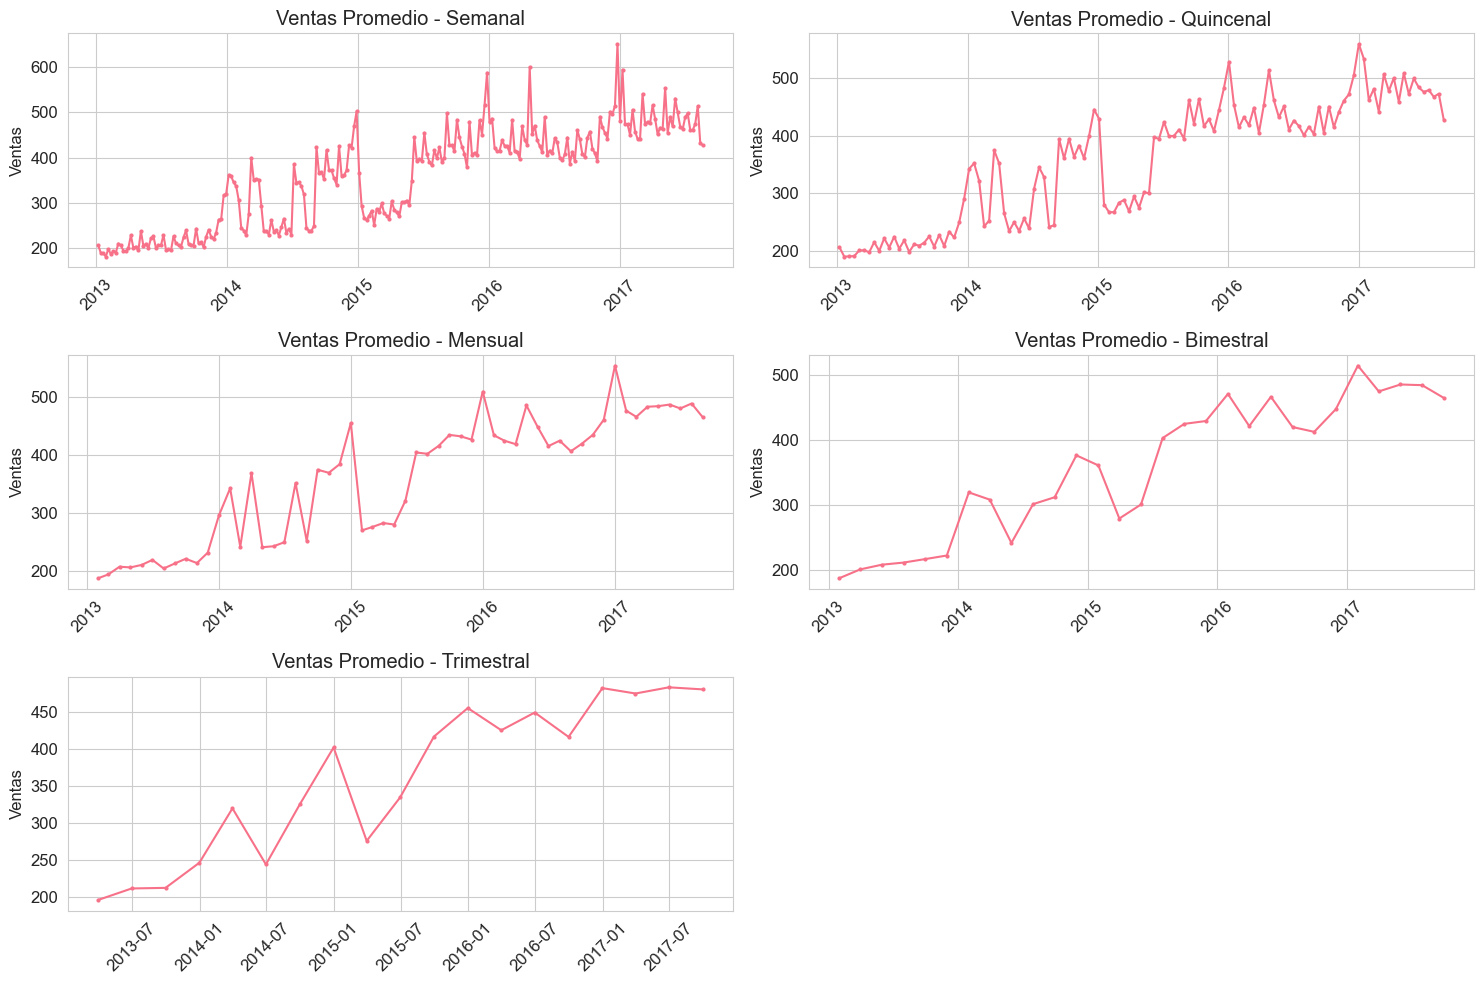


Shape del DataFrame: (468, 3)


In [27]:
# en el semanal y quincenal se pueden ver subidas y bajadas en algunos casos que se podrian
# asociar al cobro quincenal del sueldo , mejor dicho los dias 15 y ultimo dia del mes
# en los primeros meses se ve que los primeros dias de cada mes es la semana que mas gasta
#  2013-01-06         206.8435
#  2013-01-13         190.2852
#  2013-02-03         198.5643
#  2013-02-10         187.7882
#  2013-03-03         210.8891
#  2013-03-10         206.5403

# Crear diferentes agregaciones temporales
agregaciones = {
   'Semanal': df_consolidated.groupby(pd.Grouper(key='date', freq='W'))['sales'].mean(),
   'Quincenal': df_consolidated.groupby(pd.Grouper(key='date', freq='2W'))['sales'].mean(),
   'Mensual': df_consolidated.groupby(pd.Grouper(key='date', freq='M'))['sales'].mean(),
   'Bimestral': df_consolidated.groupby(pd.Grouper(key='date', freq='2M'))['sales'].mean(),
   'Trimestral': df_consolidated.groupby(pd.Grouper(key='date', freq='Q'))['sales'].mean()
}

# Crear DataFrame consolidado
df_agregaciones = pd.DataFrame()
for periodo, datos in agregaciones.items():
   temp_df = datos.reset_index()
   temp_df.columns = ['fecha', 'ventas_promedio']
   temp_df['periodo'] = periodo
   df_agregaciones = pd.concat([df_agregaciones, temp_df], ignore_index=True)

print("Primeras filas del DataFrame de agregaciones:")
print(df_agregaciones.head(20))

# Gráfico comparativo
plt.figure(figsize=(15, 10))
for i, periodo in enumerate(['Semanal', 'Quincenal', 'Mensual', 'Bimestral', 'Trimestral'], 1):
   plt.subplot(3, 2, i)
   data = df_agregaciones[df_agregaciones['periodo'] == periodo]
   plt.plot(data['fecha'], data['ventas_promedio'], marker='o', markersize=2)
   plt.title(f'Ventas Promedio - {periodo}')
   plt.xticks(rotation=45)
   plt.ylabel('Ventas')

plt.tight_layout()
plt.show()

print(f"\nShape del DataFrame: {df_agregaciones.shape}")

In [28]:
df_consolidated['año_mes'] = df_consolidated['date'].dt.to_period('M').astype(str)

enero_2013 = df_consolidated[df_consolidated['año_mes'] == '2013-01']['sales']

print("ANÁLISIS DETALLADO - ENERO 2013")
print("="*40)
print(f"Total de registros: {len(enero_2013):,}")
print(f"Registros con ventas = 0: {(enero_2013 == 0).sum():,}")
print(f"Registros con ventas > 0: {(enero_2013 > 0).sum():,}")
print(f"Porcentaje sin ventas: {((enero_2013 == 0).sum() / len(enero_2013)) * 100:.1f}%")
print(f"Porcentaje con ventas: {((enero_2013 > 0).sum() / len(enero_2013)) * 100:.1f}%")

print(f"\nEstadísticas de registros CON ventas (>0):")
ventas_positivas = enero_2013[enero_2013 > 0]
print(f"Cantidad: {len(ventas_positivas):,}")
print(f"Mínimo: {ventas_positivas.min():.2f}")
print(f"Máximo: {ventas_positivas.max():.2f}")
print(f"Promedio: {ventas_positivas.mean():.2f}")
print(f"Mediana: {ventas_positivas.median():.2f}")

print(f"\nDistribución de valores:")
print(f"Ventas = 0: {(enero_2013 == 0).sum():,}")
print(f"Ventas 0-10: {((enero_2013 > 0) & (enero_2013 <= 10)).sum():,}")
print(f"Ventas 10-50: {((enero_2013 > 10) & (enero_2013 <= 50)).sum():,}")
print(f"Ventas 50-100: {((enero_2013 > 50) & (enero_2013 <= 100)).sum():,}")
print(f"Ventas >100: {(enero_2013 > 100).sum():,}")

ANÁLISIS DETALLADO - ENERO 2013
Total de registros: 55,242
Registros con ventas = 0: 29,760
Registros con ventas > 0: 25,482
Porcentaje sin ventas: 53.9%
Porcentaje con ventas: 46.1%

Estadísticas de registros CON ventas (>0):
Cantidad: 25,482
Mínimo: 1.00
Máximo: 19849.00
Promedio: 405.29
Mediana: 101.00

Distribución de valores:
Ventas = 0: 29,760
Ventas 0-10: 5,745
Ventas 10-50: 4,297
Ventas 50-100: 2,665
Ventas >100: 12,775


In [29]:


# Generar periodos mensuales desde enero 2013 hasta agosto 2017
periodos_mes = pd.period_range(start='2013-01', end='2017-08', freq='M').astype(str).tolist()

# Crear tabla completa con análisis detallado para todos los meses
resultados_detallados = []

for periodo in periodos_mes:
   data = df_consolidated[df_consolidated['año_mes'] == periodo]['sales']
   
   # Estadísticas básicas
   total_registros = len(data)
   ventas_cero = (data == 0).sum()
   ventas_positivas = (data > 0).sum()
   
   # Estadísticas de ventas positivas
   ventas_pos_data = data[data > 0]
   
   # Distribución por rangos
   rango_0_10 = ((data > 0) & (data <= 10)).sum()
   rango_10_50 = ((data > 10) & (data <= 50)).sum()
   rango_50_100 = ((data > 50) & (data <= 100)).sum()
   rango_mas_100 = (data > 100).sum()
   
   resultados_detallados.append({
       'periodo': str(periodo),
       'total_registros': total_registros,
       'ventas_cero': ventas_cero,
       'ventas_positivas': ventas_positivas,
       'pct_sin_ventas': (ventas_cero / total_registros) * 100,
       'pct_con_ventas': (ventas_positivas / total_registros) * 100,
       'promedio_positivas': ventas_pos_data.mean() if len(ventas_pos_data) > 0 else 0,
       'mediana_positivas': ventas_pos_data.median() if len(ventas_pos_data) > 0 else 0,
       'max_ventas': ventas_pos_data.max() if len(ventas_pos_data) > 0 else 0,
       'rango_0_10': rango_0_10,
       'rango_10_50': rango_10_50,
       'rango_50_100': rango_50_100,
       'rango_mas_100': rango_mas_100
   })

# Convertir a DataFrame
df_analisis_completo = pd.DataFrame(resultados_detallados)

# Mostrar tabla completa
print("ANÁLISIS COMPLETO POR MES - DISTRIBUCIÓN DE VENTAS")
print("="*80)

# Tabla principal
print(df_analisis_completo[['periodo', 'total_registros', 'ventas_cero', 'ventas_positivas', 
                          'pct_sin_ventas', 'pct_con_ventas']].round(1).to_string(index=False))

print("\n" + "="*80)
print("ESTADÍSTICAS DE VENTAS POSITIVAS")
print("="*80)
print(df_analisis_completo[['periodo', 'promedio_positivas', 'mediana_positivas', 
                          'max_ventas']].round(2).to_string(index=False))

print("\n" + "="*80)
print("DISTRIBUCIÓN POR RANGOS")
print("="*80)
print(df_analisis_completo[['periodo', 'rango_0_10', 'rango_10_50', 'rango_50_100', 
                          'rango_mas_100']].to_string(index=False))

# Guardar la tabla
df_analisis_completo.to_csv('analisis_ventas_mensual.csv', index=False)
print(f"\n✓ Tabla guardada como 'analisis_ventas_mensual.csv'")

ANÁLISIS COMPLETO POR MES - DISTRIBUCIÓN DE VENTAS
periodo  total_registros  ventas_cero  ventas_positivas  pct_sin_ventas  pct_con_ventas
2013-01            55242        29760             25482         53.9000         46.1000
2013-02            49896        26088             23808         52.3000         47.7000
2013-03            55242        28089             27153         50.8000         49.2000
2013-04            53460        26858             26602         50.2000         49.8000
2013-05            55242        27359             27883         49.5000         50.5000
2013-06            53460        26396             27064         49.4000         50.6000
2013-07            55242        27970             27272         50.6000         49.4000
2013-08            55242        27570             27672         49.9000         50.1000
2013-09            53460        26741             26719         50.0000         50.0000
2013-10            55242        27631             27611         50.00

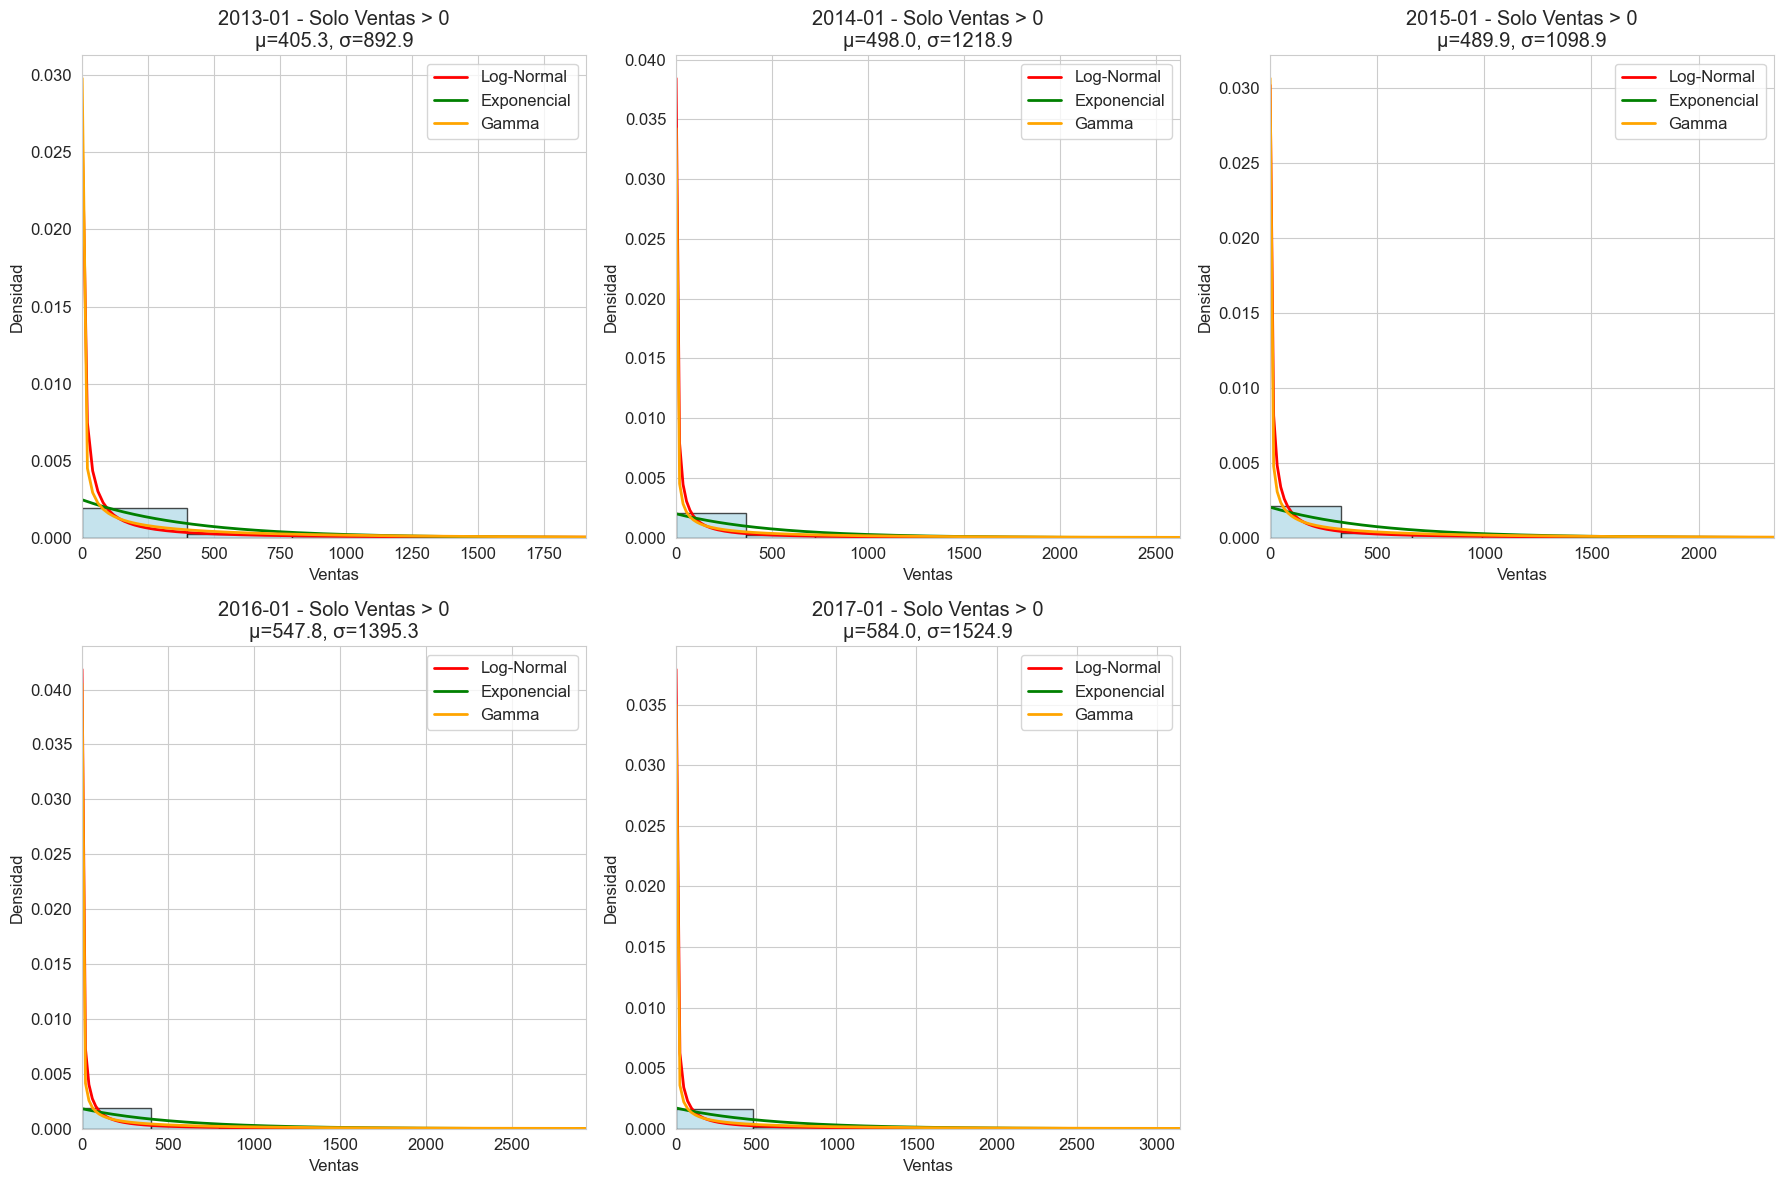

ANÁLISIS DE FORMA DE DISTRIBUCIONES (solo ventas > 0):
2013-01: Skewness=5.59, Kurtosis=51.78
  -> Muy sesgada a la derecha (cola larga)

2014-01: Skewness=5.05, Kurtosis=35.30
  -> Muy sesgada a la derecha (cola larga)

2015-01: Skewness=5.21, Kurtosis=39.90
  -> Muy sesgada a la derecha (cola larga)

2016-01: Skewness=5.22, Kurtosis=36.93
  -> Muy sesgada a la derecha (cola larga)

2017-01: Skewness=5.44, Kurtosis=40.97
  -> Muy sesgada a la derecha (cola larga)



In [30]:
#tratar de verlo de esta forma no esta funcionando,podria ver de pensar en una distrib partida
# y que para cada cuartil sea una distrib distinta y uso las proporciones para "decidir" a cual quartil pertenece
# ejemplo los ultimos 3 meses esta es la proporcion (0 a 0.25)1er quartil 33% ,(0.25 a 0.5) 2do quartil 20% ,(0.5 a 0.75) 3er 10% , (0.75 a 1) 37%
# y dentro de cada cuartil tiene una distrib aleatoria , pero sigo viendo otras cosas antes de seguir por aca
# Seleccionar algunos meses representativos para visualizar
meses_ejemplo = ['2013-01', '2014-01', '2015-01', '2016-01', '2017-01']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, periodo in enumerate(meses_ejemplo):
   # Obtener solo las ventas positivas
   ventas_positivas = df_consolidated[
       (df_consolidated['año_mes'] == periodo) & 
       (df_consolidated['sales'] > 0)
   ]['sales']
   
   # Histograma
   axes[i].hist(ventas_positivas, bins=50, density=True, alpha=0.7, 
               color='lightblue', edgecolor='black')
   
   # Estadísticas
   mean_val = ventas_positivas.mean()
   std_val = ventas_positivas.std()
   
   # Generar x para las curvas
   x = np.linspace(ventas_positivas.min(), ventas_positivas.max(), 1000)
   
   # Distribución Log-Normal (común para datos de ventas)
   try:
       shape, loc, scale = stats.lognorm.fit(ventas_positivas, floc=0)
       lognorm_curve = stats.lognorm.pdf(x, shape, loc, scale)
       axes[i].plot(x, lognorm_curve, 'r-', linewidth=2, label='Log-Normal')
   except:
       pass
   
   # Distribución Exponencial
   try:
       loc, scale = stats.expon.fit(ventas_positivas, floc=0)
       expon_curve = stats.expon.pdf(x, loc, scale)
       axes[i].plot(x, expon_curve, 'g-', linewidth=2, label='Exponencial')
   except:
       pass
   
   # Distribución Gamma
   try:
       alpha, loc, beta = stats.gamma.fit(ventas_positivas, floc=0)
       gamma_curve = stats.gamma.pdf(x, alpha, loc, beta)
       axes[i].plot(x, gamma_curve, 'orange', linewidth=2, label='Gamma')
   except:
       pass
   
   axes[i].set_title(f'{periodo} - Solo Ventas > 0\nμ={mean_val:.1f}, σ={std_val:.1f}')
   axes[i].legend()
   axes[i].set_xlabel('Ventas')
   axes[i].set_ylabel('Densidad')
   axes[i].set_xlim(0, np.percentile(ventas_positivas, 95))  # Cortar outliers para mejor visualización

# Eliminar subplot vacío
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

# Análisis estadístico de la forma
print("ANÁLISIS DE FORMA DE DISTRIBUCIONES (solo ventas > 0):")
print("="*60)
for periodo in meses_ejemplo:
   ventas_pos = df_consolidated[
       (df_consolidated['año_mes'] == periodo) & 
       (df_consolidated['sales'] > 0)
   ]['sales']
   
   skewness = stats.skew(ventas_pos)
   kurtosis = stats.kurtosis(ventas_pos)
   
   print(f"{periodo}: Skewness={skewness:.2f}, Kurtosis={kurtosis:.2f}")
   if skewness > 1:
       print(f"  -> Muy sesgada a la derecha (cola larga)")
   elif skewness > 0.5:
       print(f"  -> Moderadamente sesgada a la derecha")
   
   print()

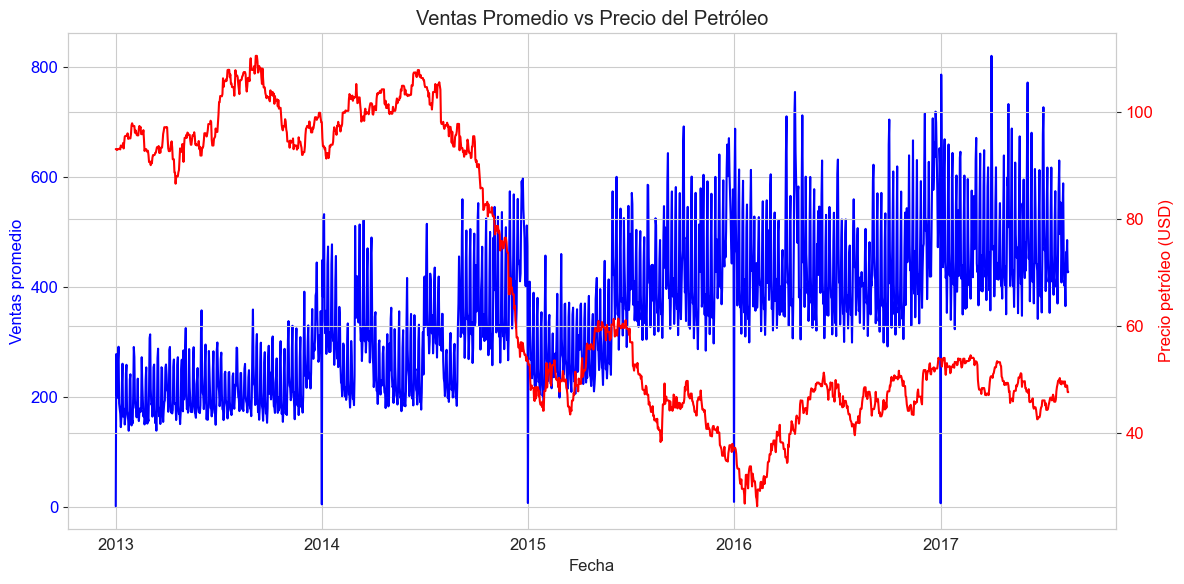

Correlación: -0.627


In [31]:
# correlacion negativa de -0.62
# Promedio diario de ventas y precio del petróleo
daily_data = df_consolidated.groupby('date').agg({
   'sales': 'mean',
   'dcoilwtico': 'first'  # Precio es el mismo para toda la fecha
}).reset_index()

# Gráfico con dos ejes Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Ventas en eje izquierdo
ax1.plot(daily_data['date'], daily_data['sales'], color='blue', label='Ventas promedio')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Ventas promedio', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Precio petróleo en eje derecho
ax2 = ax1.twinx()
ax2.plot(daily_data['date'], daily_data['dcoilwtico'], color='red', label='Precio petróleo')
ax2.set_ylabel('Precio petróleo (USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Ventas Promedio vs Precio del Petróleo')
plt.tight_layout()
plt.show()

# Correlación
corr = daily_data['sales'].corr(daily_data['dcoilwtico'])
print(f"Correlación: {corr:.3f}")

In [32]:
#veamos como se distribuyen las ventas en familias y en tiendas

# Promedio de ventas por mes para cada familia
ventas_familia_mes = df_consolidated.groupby(['año_mes', 'family'])['sales'].mean().reset_index()
ventas_familia_pivot = ventas_familia_mes.pivot(index='año_mes', columns='family', values='sales')

print("PROMEDIO DE VENTAS POR MES - CADA FAMILIA:")
print("="*60)
print(ventas_familia_pivot.round(2))

print(f"\nShape de la tabla familias: {ventas_familia_pivot.shape}")
print(f"Familias únicas: {len(ventas_familia_pivot.columns)}")

# Promedio de ventas por mes para cada tienda
ventas_tienda_mes = df_consolidated.groupby(['año_mes', 'store_nbr'])['sales'].mean().reset_index()
ventas_tienda_pivot = ventas_tienda_mes.pivot(index='año_mes', columns='store_nbr', values='sales')

print("\n" + "="*60)
print("PROMEDIO DE VENTAS POR MES - CADA TIENDA:")
print("="*60)
print(ventas_tienda_pivot.round(2))

print(f"\nShape de la tabla tiendas: {ventas_tienda_pivot.shape}")
print(f"Tiendas únicas: {len(ventas_tienda_pivot.columns)}")

# Guardar las tablas
ventas_familia_pivot.to_csv('ventas_familia_mensual.csv')
ventas_tienda_pivot.to_csv('ventas_tienda_mensual.csv')
print(f"\n✓ Tablas guardadas como 'ventas_familia_mensual.csv' y 'ventas_tienda_mensual.csv'")

PROMEDIO DE VENTAS POR MES - CADA FAMILIA:
family   AUTOMOTIVE  BABY CARE  BEAUTY  BEVERAGES  BOOKS  BREAD/BAKERY  \
año_mes                                                                  
2013-01      3.9200     0.0000  2.4000   998.0000 0.0000      328.4200   
2013-02      4.7800     0.0000  2.4800   997.5200 0.0000      330.5600   
2013-03      4.5600     0.0000  2.3300  1088.5400 0.0000      354.8500   
2013-04      4.6200     0.0000  2.2700  1076.0000 0.0000      351.0000   
2013-05      5.4000     0.0000  2.2200  1089.6800 0.0000      368.0100   
2013-06      5.1300     0.0000  2.3700  1129.0800 0.0000      375.1800   
2013-07      5.0800     0.0000  2.8600   994.3000 0.0000      339.6000   
2013-08      4.8800     0.0000  2.8200  1081.8000 0.0000      343.1100   
2013-09      4.3400     0.0000  2.2300  1177.8700 0.0000      379.8800   
2013-10      4.0600     0.0000  2.2400  1108.3400 0.0000      364.7500   
2013-11      4.4200     0.0000  2.1300  1170.0200 0.0000      361.660

In [33]:
# ==========================================
# ANÁLISIS DE ESTACIONALIDAD POR AÑO_MES
# ==========================================

print("\n" + "="*60)
print("ANÁLISIS POR CIUDAD - CADA AÑO_MES")
print("="*60)

estacionalidad_ciudad = df_consolidated.groupby(['city', 'año_mes'])['sales'].mean().round(2).reset_index()
estacionalidad_ciudad_pivot = estacionalidad_ciudad.pivot(index='city', columns='año_mes', values='sales')
print(estacionalidad_ciudad_pivot.fillna(0))

print("\n" + "="*60)
print("ANÁLISIS POR STATE - CADA AÑO_MES")
print("="*60)

estacionalidad_state = df_consolidated.groupby(['state', 'año_mes'])['sales'].mean().round(2).reset_index()
estacionalidad_state_pivot = estacionalidad_state.pivot(index='state', columns='año_mes', values='sales')
print(estacionalidad_state_pivot.fillna(0))

print("\n" + "="*60)
print("ANÁLISIS POR TYPE_STORE - CADA AÑO_MES")
print("="*60)

estacionalidad_type = df_consolidated.groupby(['type_store', 'año_mes'])['sales'].mean().round(2).reset_index()
estacionalidad_type_pivot = estacionalidad_type.pivot(index='type_store', columns='año_mes', values='sales')
print(estacionalidad_type_pivot.fillna(0))

print("\n" + "="*60)
print("ANÁLISIS POR CLUSTER - CADA AÑO_MES")
print("="*60)

estacionalidad_cluster = df_consolidated.groupby(['cluster', 'año_mes'])['sales'].mean().round(2).reset_index()
estacionalidad_cluster_pivot = estacionalidad_cluster.pivot(index='cluster', columns='año_mes', values='sales')
print(estacionalidad_cluster_pivot.fillna(0))


ANÁLISIS POR CIUDAD - CADA AÑO_MES
año_mes        2013-01  2013-02  2013-03  2013-04  2013-05  2013-06  2013-07  \
city                                                                           
Ambato        241.9800 253.9600 260.9900 255.8800 257.9500 263.1800 250.8900   
Babahoyo      158.6400 168.7700 186.6600 182.6800 189.6700 202.2500 188.6400   
Cayambe       307.4000 344.2400 358.1500 352.7800 367.6300 372.5700 370.7900   
Cuenca        135.5000 137.0700 144.8400 169.2500 153.3800 150.7200 147.1500   
Daule         157.9200 168.6200 180.5300 177.2700 205.9300 220.6800 218.5500   
El Carmen     107.6500 117.4700 125.5300 122.4100 129.2600 131.0800 121.9200   
Esmeraldas    118.9700 145.8500 147.9000 154.7800 165.5300 172.0200 175.6900   
Guaranda      120.4600 137.3100 140.3600 142.4400 142.5200 150.9500 144.1700   
Guayaquil     147.9500 155.8100 164.3100 165.3100 176.9500 183.1800 167.6400   
Ibarra        127.3100 131.0700 134.4200 148.9600 158.4300 167.5500 151.7900   
Lata

In [34]:
# por city/store/state/cluster se puede ver buena info del comportamiento

#falta ver feriados y promociones

In [35]:
# bastante modificador onpromotion

# Ver la distribución de onpromotion
print("Valores únicos en onpromotion (primeros 20):")
print(sorted(df_consolidated['onpromotion'].unique())[:20])
print(f"\nRango: {df_consolidated['onpromotion'].min()} a {df_consolidated['onpromotion'].max()}")

# ==========================================
# ANÁLISIS IMPACTO DE PROMOCIONES
# ==========================================

print("="*60)
print("ANÁLISIS IMPACTO PROMOCIONES POR AÑO_MES")
print("="*60)

# Crear variable binaria: tiene promociones o no
df_consolidated['tiene_promo'] = (df_consolidated['onpromotion'] > 0).astype(int)

# Análisis promociones (binario)
promo_analysis = df_consolidated.groupby(['año_mes', 'tiene_promo'])['sales'].agg([
    'mean', 'median', 'count', 'sum'
]).round(2).reset_index()

# Pivot para comparar mejor
promo_pivot = promo_analysis.pivot(index='año_mes', columns='tiene_promo', values='mean')
promo_pivot.columns = ['Sin_Promocion', 'Con_Promocion'] 
promo_pivot['Diferencia'] = promo_pivot['Con_Promocion'] - promo_pivot['Sin_Promocion']
promo_pivot['Ratio'] = (promo_pivot['Con_Promocion'] / promo_pivot['Sin_Promocion']).round(2)

print("VENTAS MEDIAS: Sin Promoción vs Con Promoción")
print(promo_pivot)

# ==========================================
# ANÁLISIS POR CANTIDAD DE PROMOCIONES
# ==========================================

print("\n" + "="*60)
print("ANÁLISIS POR CANTIDAD DE PROMOCIONES")
print("="*60)

# Crear rangos de promociones
df_consolidated['rango_promo'] = pd.cut(df_consolidated['onpromotion'], 
                                       bins=[-1, 0, 5, 15, 50, float('inf')],
                                       labels=['0', '1-5', '6-15', '16-50', '50+'])

promo_cantidad = df_consolidated.groupby('rango_promo')['sales'].agg([
    'mean', 'median', 'count'
]).round(2)

print("VENTAS POR CANTIDAD DE PROMOCIONES:")
print(promo_cantidad)

# Estadísticas generales
print("\n" + "="*50)
print("RESUMEN GENERAL PROMOCIONES")
print("="*50)

sin_promo = df_consolidated[df_consolidated['onpromotion'] == 0]['sales']
con_promo = df_consolidated[df_consolidated['onpromotion'] > 0]['sales']

print(f"Sin promoción - Media: {sin_promo.mean():.2f}, Mediana: {sin_promo.median():.2f}")
print(f"Con promoción - Media: {con_promo.mean():.2f}, Mediana: {con_promo.median():.2f}")
print(f"Diferencia media: {con_promo.mean() - sin_promo.mean():.2f}")
print(f"Ratio (con/sin): {con_promo.mean() / sin_promo.mean():.2f}x")

# Correlación entre cantidad de promociones y ventas
correlacion = df_consolidated['onpromotion'].corr(df_consolidated['sales'])
print(f"\nCorrelación cantidad promociones vs ventas: {correlacion:.3f}")

Valores únicos en onpromotion (primeros 20):
[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19)]

Rango: 0 a 741
ANÁLISIS IMPACTO PROMOCIONES POR AÑO_MES
VENTAS MEDIAS: Sin Promoción vs Con Promoción
         Sin_Promocion  Con_Promocion  Diferencia   Ratio
año_mes                                                  
2013-01       186.9500            NaN         NaN     NaN
2013-02       193.5800            NaN         NaN     NaN
2013-03       206.8800            NaN         NaN     NaN
2013-04       205.6400            NaN         NaN     NaN
2013-05       209.9400            NaN         NaN     NaN
2013-06       218.6600            NaN         NaN     NaN
2013-07       203.7800            NaN         NaN     NaN
2013-08       212.4800            NaN         NaN     NaN
2

In [36]:
# ==========================================
# ANÁLISIS IMPACTO DE FERIADOS
# ==========================================

print("\n" + "="*60)
print("ANÁLISIS IMPACTO FERIADOS POR AÑO_MES")
print("="*60)

# Crear análisis feriados
feriado_analysis = df_consolidated.groupby(['año_mes', 'has_holiday'])['sales'].agg([
   'mean', 'median', 'count', 'sum'
]).round(2).reset_index()

# Pivot para comparar mejor
feriado_pivot = feriado_analysis.pivot(index='año_mes', columns='has_holiday', values='mean')
feriado_pivot.columns = ['Sin_Feriado', 'Con_Feriado']
feriado_pivot['Diferencia'] = feriado_pivot['Con_Feriado'] - feriado_pivot['Sin_Feriado'] 
feriado_pivot['Ratio'] = (feriado_pivot['Con_Feriado'] / feriado_pivot['Sin_Feriado']).round(2)

print("VENTAS MEDIAS: Sin Feriado vs Con Feriado")
print(feriado_pivot)

# ==========================================
# ANÁLISIS POR TIPO DE FERIADO
# ==========================================

print("\n" + "="*60)
print("ANÁLISIS POR TIPO DE FERIADO")
print("="*60)

# Ver qué tipos de feriados hay
print("Tipos de feriados disponibles:")
print(df_consolidated['type_holiday'].value_counts())

# Análisis por tipo de feriado (excluyendo 'No Event')
feriados_reales = df_consolidated[df_consolidated['type_holiday'] != 'No Event']

if len(feriados_reales) > 0:
   tipo_feriado_stats = feriados_reales.groupby('type_holiday')['sales'].agg([
       'mean', 'median', 'count'
   ]).round(2)
   
   print("\nVENTAS POR TIPO DE FERIADO:")
   print(tipo_feriado_stats.sort_values('mean', ascending=False))

# ==========================================
# ANÁLISIS POR DESCRIPCIÓN DE FERIADO
# ==========================================

print("\n" + "="*60)
print("FERIADOS ESPECÍFICOS CON MAYOR IMPACTO")
print("="*60)

# Feriados específicos (excluyendo 'No Event')
feriados_especificos = df_consolidated[df_consolidated['description'] != 'No Event']

if len(feriados_especificos) > 0:
   feriado_descripcion = feriados_especificos.groupby('description')['sales'].agg([
       'mean', 'median', 'count'
   ]).round(2)
   
   # Mostrar solo feriados con suficientes observaciones
   feriado_descripcion_filtrado = feriado_descripcion[feriado_descripcion['count'] >= 50]
   
   print("TOP FERIADOS POR VENTAS MEDIAS (mínimo 50 observaciones):")
   print(feriado_descripcion_filtrado.sort_values('mean', ascending=False))

# ==========================================
# ESTADÍSTICAS GENERALES FERIADOS
# ==========================================

print("\n" + "="*50)
print("RESUMEN GENERAL FERIADOS")
print("="*50)

sin_feriado = df_consolidated[df_consolidated['has_holiday'] == False]['sales']
con_feriado = df_consolidated[df_consolidated['has_holiday'] == True]['sales']

print(f"Sin feriado - Media: {sin_feriado.mean():.2f}, Mediana: {sin_feriado.median():.2f}")
print(f"Con feriado - Media: {con_feriado.mean():.2f}, Mediana: {con_feriado.median():.2f}")
print(f"Diferencia media: {con_feriado.mean() - sin_feriado.mean():.2f}")
print(f"Ratio (con/sin): {con_feriado.mean() / sin_feriado.mean():.2f}x")

# Contar registros
print(f"\nRegistros sin feriado: {len(sin_feriado):,}")
print(f"Registros con feriado: {len(con_feriado):,}")
print(f"% con feriado: {len(con_feriado)/(len(sin_feriado) + len(con_feriado))*100:.1f}%")

# ==========================================
# ANÁLISIS DE DÍAS TRANSFERIDOS
# ==========================================

print("\n" + "="*50)
print("ANÁLISIS FERIADOS TRANSFERIDOS")
print("="*50)

if 'transferred' in df_consolidated.columns:
   transferidos = df_consolidated.groupby('transferred')['sales'].agg([
       'mean', 'median', 'count'
   ]).round(2)
   
   print("VENTAS: Feriados normales vs transferidos")
   print(transferidos)


ANÁLISIS IMPACTO FERIADOS POR AÑO_MES
VENTAS MEDIAS: Sin Feriado vs Con Feriado
         Sin_Feriado  Con_Feriado  Diferencia  Ratio
año_mes                                             
2013-01     189.2800     165.1900    -24.0900 0.8700
2013-02     195.7900     164.8200    -30.9700 0.8400
2013-03     203.5300     307.4400    103.9100 1.5100
2013-04     201.0600     228.5200     27.4600 1.1400
2013-05     203.5000     253.4100     49.9100 1.2500
2013-06     218.0400     227.3000      9.2600 1.0400
2013-07     206.9900     182.1200    -24.8700 0.8800
2013-08     211.2700     220.6600      9.3900 1.0400
2013-09     218.8200     272.1100     53.2900 1.2400
2013-10     213.9800     205.5400     -8.4400 0.9600
2013-11     223.1300     257.4300     34.3000 1.1500
2013-12     283.8400     323.0700     39.2300 1.1400
2014-01     353.5900       4.8300   -348.7600 0.0100
2014-02     241.2700          NaN         NaN    NaN
2014-03     367.4700     379.7800     12.3100 1.0300
2014-04     239.55

In [37]:
#los feriados no parece impactar tanto como las promociones
#opto por correr un modelo lgb para ver como va todo
#agrego lag y a la hora de las predicciones las haga de a 1 dia



In [38]:
# este para el periodo 2016-01-01 a 2017-08-15 train2 y test2

def preparar_features(df, fecha_terremoto='2016-04-16', filtro_desde='2016-01-01'):
    
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])
    # FILTRO POR FECHA (antes de eliminar la columna date)
    if filtro_desde:
        df = df[df['date'] >= filtro_desde]

    # Features temporales existentes
    df['día_semana'] = df['date'].dt.dayofweek
    df['día_mes'] = df['date'].dt.day
    df['mes'] = df['date'].dt.month
    df['año'] = df['date'].dt.year
    df['es_fin_semana'] = df['día_semana'].isin([5,6]).astype(int)
    
    # Feature del terremoto
    fecha_terremoto = pd.to_datetime(fecha_terremoto)
    fecha_60_dias = fecha_terremoto + pd.Timedelta(days=60)
    
    def asignar_terremoto(fecha):
        if fecha == fecha_terremoto:
            return 1  # Día del terremoto
        elif fecha_terremoto < fecha <= fecha_60_dias:
            return 2  # 60 días después del terremoto
        elif fecha > fecha_60_dias:
            return 3  # Días siguientes (después de 60 días)
        else:
            return 0  # Antes del terremoto
    
    df['terremoto_efecto'] = df['date'].apply(asignar_terremoto)
    
    return df

# 
train2 = preparar_features(train1, fecha_terremoto='2016-04-16',filtro_desde='2016-01-01')  
test2 = preparar_features(test1, fecha_terremoto='2016-04-16',filtro_desde='2016-01-01')   

# Verificar la distribución
print("Distribución efecto terremoto en train:")
print(train2['terremoto_efecto'].value_counts().sort_index())
print("\nDistribución efecto terremoto en test:")
print(test2['terremoto_efecto'].value_counts().sort_index())

Distribución efecto terremoto en train:
terremoto_efecto
0    188892
1      1782
2    106920
3    757350
Name: count, dtype: int64

Distribución efecto terremoto en test:
terremoto_efecto
3    28512
Name: count, dtype: int64


In [39]:
# este para todo el periodo
 
def preparar_features(df, fecha_terremoto='2016-04-16'):
    
    df = df.copy()
    df['date'] = pd.to_datetime(df['date'])

    # Features temporales existentes
    df['día_semana'] = df['date'].dt.dayofweek
    df['día_mes'] = df['date'].dt.day
    df['mes'] = df['date'].dt.month
    df['año'] = df['date'].dt.year
    df['es_fin_semana'] = df['día_semana'].isin([5,6]).astype(int)
    
    # Feature del terremoto
    fecha_terremoto = pd.to_datetime(fecha_terremoto)
    fecha_60_dias = fecha_terremoto + pd.Timedelta(days=60)
    
    def asignar_terremoto(fecha):
        if fecha == fecha_terremoto:
            return 1  # Día del terremoto
        elif fecha_terremoto < fecha <= fecha_60_dias:
            return 2  # 60 días después del terremoto
        elif fecha > fecha_60_dias:
            return 3  # Días siguientes (después de 60 días)
        else:
            return 0  # Antes del terremoto
    
    df['terremoto_efecto'] = df['date'].apply(asignar_terremoto)
    
    return df

# 
train1 = preparar_features(train1, fecha_terremoto='2016-04-16')  
test1 = preparar_features(test1, fecha_terremoto='2016-04-16')   

# Verificar la distribución
print("Distribución efecto terremoto en train:")
print(train1['terremoto_efecto'].value_counts().sort_index())
print("\nDistribución efecto terremoto en test:")
print(test1['terremoto_efecto'].value_counts().sort_index())


Distribución efecto terremoto en train:
terremoto_efecto
0    2134836
1       1782
2     106920
3     757350
Name: count, dtype: int64

Distribución efecto terremoto en test:
terremoto_efecto
3    28512
Name: count, dtype: int64


In [40]:
encoders = {}
categorical_cols = ['family', 'city', 'state', 'type_store']

for col in categorical_cols:
    encoders[col] = LabelEncoder()
    # Fit con todas las categorías (train + test)
    all_values = pd.concat([train1[col], test1[col]]).astype(str)
    encoders[col].fit(all_values)
    
    # Aplicar encoding
    train1[col + '_encoded'] = encoders[col].transform(train1[col].astype(str))
    test1[col + '_encoded'] = encoders[col].transform(test1[col].astype(str))



encoders = {}
categorical_cols = ['family', 'city', 'state', 'type_store']

for col in categorical_cols:
    encoders[col] = LabelEncoder()
    # Fit con todas las categorías (train + test)
    all_values = pd.concat([train2[col], test2[col]]).astype(str)
    encoders[col].fit(all_values)
    
    # Aplicar encoding
    train2[col + '_encoded'] = encoders[col].transform(train2[col].astype(str))
    test2[col + '_encoded'] = encoders[col].transform(test2[col].astype(str))

In [41]:
def crear_features_train(df):
    df = df.copy()
    df = df.sort_values(['store_nbr', 'family', 'date'])
    
    # Lags
    df['lag_1'] = df.groupby(['store_nbr', 'family'])['sales'].shift(1)
    df['lag_7'] = df.groupby(['store_nbr', 'family'])['sales'].shift(7)
    df['lag_15'] = df.groupby(['store_nbr', 'family'])['sales'].shift(15)
    
    # Rolling means
    df['mean_7d'] = df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(7).mean())
    df['mean_15d'] = df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(15).mean())
    df['mean_30d'] = df.groupby(['store_nbr', 'family'])['sales'].transform(lambda x: x.rolling(30).mean())
    
    return df

train1 = crear_features_train(train1)
train2 = crear_features_train(train2)

In [42]:
feature_cols = [
    'store_nbr', 'onpromotion', 'cluster', 'dcoilwtico',
    'día_semana', 'día_mes', 'mes', 'año', 'es_fin_semana',
    'has_holiday', 'lag_1', 'lag_7', 'lag_15', 'mean_7d','mean_15d','mean_30d',
    'family_encoded', 'city_encoded', 'state_encoded', 'type_store_encoded','terremoto_efecto'
]

train_clean = train1.dropna(subset=feature_cols)
X_train = train_clean[feature_cols]
y_train = train_clean['sales']

train_clean2 = train2.dropna(subset=feature_cols)
X_recent = train_clean2[feature_cols]
y_recent = train_clean2['sales']

In [43]:
X_train.head()

,store_nbr,onpromotion,cluster,dcoilwtico,día_semana,día_mes,mes,año,es_fin_semana,has_holiday,lag_1,lag_7,lag_15,mean_7d,mean_15d,mean_30d,family_encoded,city_encoded,state_encoded,type_store_encoded,terremoto_efecto
51678,1,0,13,97.9800,2,30,1,2013,0,False,2.0000,3.0000,1.0000,3.1429,2.4667,2.2667,0,18,12,3,0
53460,1,0,13,97.6500,3,31,1,2013,0,False,6.0000,0.0000,1.0000,3.1429,2.4000,2.2667,0,18,12,3,0
55242,1,0,13,97.4600,4,1,2,2013,0,False,0.0000,5.0000,1.0000,2.8571,2.5333,2.3000,0,18,12,3,0
57024,1,0,13,97.4600,5,2,2,2013,1,False,3.0000,4.0000,0.0000,2.2857,2.5333,2.2000,0,18,12,3,0
58806,1,0,13,97.4600,6,3,2,2013,1,False,0.0000,2.0000,5.0000,2.0000,2.2000,2.1000,0,18,12,3,0


In [44]:
X_recent.head()

,store_nbr,onpromotion,cluster,dcoilwtico,día_semana,día_mes,mes,año,es_fin_semana,has_holiday,lag_1,lag_7,lag_15,mean_7d,mean_15d,mean_30d,family_encoded,city_encoded,state_encoded,type_store_encoded,terremoto_efecto
1997622,1,0,13,33.6600,5,30,1,2016,1,False,9.0000,5.0000,5.0000,4.0000,5.2000,4.8000,0,18,12,3,0
1999404,1,0,13,33.6600,6,31,1,2016,1,False,4.0000,3.0000,17.0000,3.8571,4.2000,4.8667,0,18,12,3,0
2001186,1,0,13,31.6200,0,1,2,2016,0,False,2.0000,1.0000,3.0000,4.7143,4.4667,4.8667,0,18,12,3,0
2002968,1,0,13,29.9000,1,2,2,2016,0,False,7.0000,2.0000,3.0000,5.4286,4.7333,5.0667,0,18,12,3,0
2004750,1,0,13,32.2900,2,3,2,2016,0,False,7.0000,7.0000,10.0000,5.1429,4.4000,4.9667,0,18,12,3,0


In [45]:
# 0.74411 el primer modelo , puesto 461 
# falta ver feature importance para decidir como seguir y encarar un feature eng # mean_15d/transactions que no se hizo nada
# ver de agregar una columna con 0,1,2 para earthquake = 1 , no  earthquake = 0 , repercursiones del earthquake = 2
# 16-4-2016 earthquake no se cuanto tiempo seria el ideal para las repercusiones
# lo siguiente seria random_search o grid_search , para ver cuanto podria mejorar sin hacer cambios en las variables
# como maximo podria mejorar entre un 2 a 5 % , asi que cambios si o si van a haber
# modelar con un XGB o CATboost
# por lo visto pesa mucho los ultimos dias y no hay cambios bruscos , asi que tambien queria hacer un ensemble,
# con los modelos mencionados y probando con distintos rangos de tiempo , ejemplo solo los ultimos 3 años / 2/ 1 
# y un ponderamiento mayor a lo mas reciente en el ensemble , quedan varias cosas por probar
# y si , si o si una NN para ver como viene
# el objetivo seria tratar de entrar en el top 50 de kaggle mejorar hasta 0.40356 que es bastante
# el top 1 es 0.37763


# V1 0.74411
"""model = lgb.LGBMRegressor(
    objective='regression',
    metric='rmse',
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=1000,
    random_state=42,
    verbose=-1
)"""
# V2 
# agregue un catboost y un xgb ,al correrlos tardaba mucho 
# agregue mean_15d
# agregue columna de earthquake
# reduje los datos para que sean del 1/01/2016 al 15/8/2017 para que tarde menos y de los mejores
# los pruebo con toda la info en al siguiente version

"model = lgb.LGBMRegressor(\n    objective='regression',\n    metric='rmse',\n    num_leaves=31,\n    learning_rate=0.05,\n    n_estimators=1000,\n    random_state=42,\n    verbose=-1\n)"

In [67]:
%%time
#LGBM1 Random_search

from sklearn.metrics import mean_squared_log_error, make_scorer
from scipy.stats import uniform, randint

#def rmsle_score(y_true, y_pred):
#    y_pred = np.maximum(y_pred, 0)  # Evitar valores negativos
#    return np.sqrt(mean_squared_log_error(y_true, y_pred))

#rmsle_scorer = make_scorer(rmsle_score, greater_is_better=False)

def random_search_lgbm(X_recent, y_recent, n_iter=2, cv=3):
    """
    Random Search para LightGBM optimizando RMSLE
    """
    
    # Modelo base
    lgbm1 = lgb.LGBMRegressor(
        objective='regression',
        metric='rmse',
        random_state=10,
        verbose=-1,
        n_jobs=-1
    )
    
    param_distributions = {
        'num_leaves': [50, 100, 150, 200, 300],#randint(10, 200)
        'learning_rate': [0.02, 0.05, 0.1, 0.15],  # uniform(0.01, 0.29)
        'n_estimators': [300, 450, 800, 1200, 1800],# randint(300, 2000)
        'max_depth': [3, 7, 12, 16],# subirlo para la proxima
        'min_child_samples': [10, 35, 60, 90],#randint(10, 100)
        'subsample': [ 0.7, 0.8, 0.9, 0.95],  # 0.6 a 1.0 uniform(0.6, 0.4)
        'colsample_bytree': [ 0.7, 0.8, 0.9, 0.95],  # 0.6 a 1.0 uniform(0.6, 0.4)
        'reg_alpha': [0.15, 0.3, 0.5, 0.75, 1.00],# uniform(0, 1)
        'reg_lambda': [0.15, 0.3, 0.5, 0.75, 1.00],# uniform(0, 1)
        'min_split_gain': [0, 0.02, 0.04, 0.07, 0.1],# uniform(0, 0.1)
        'min_child_weight': [0.01, 0.02, 0.04, 0.06, 0.08, 0.1]# uniform(0.001, 0.1)
    }
    
    # Random Search
    random_search = RandomizedSearchCV(
        estimator=lgbm1,
        param_distributions=param_distributions,
        n_iter=n_iter,
        scoring='neg_mean_absolute_error',
        cv=cv,
        n_jobs=-4,
        verbose=3,
        random_state=10,
        return_train_score=True
    )
    
    random_search.fit(X_recent, y_recent)
    
    print("Mejores parámetros (Random Search):")
    print(random_search.best_params_)
    print(f"Mejor 'neg_mean_absolute_error': {-random_search.best_score_:.6f}")
    
    return random_search.best_estimator_, random_search

# 
best_model, search_results = random_search_lgbm(X_recent, y_recent, n_iter=200, cv=3)




Fitting 3 folds for each of 200 candidates, totalling 600 fits
Mejores parámetros (Random Search):
{'subsample': 0.7, 'reg_lambda': 0.15, 'reg_alpha': 0.3, 'num_leaves': 300, 'n_estimators': 1200, 'min_split_gain': 0.02, 'min_child_weight': 0.06, 'min_child_samples': 10, 'max_depth': 12, 'learning_rate': 0.15, 'colsample_bytree': 0.8}
Mejor RMSLE: 0.461784
CPU times: total: 4min 36s
Wall time: 3h 43min 29s


In [57]:
def analizar_resultados_hyperparameters(search_results, top_percent=0.1):
    """
    Analiza los resultados de RandomizedSearchCV para encontrar patrones
    """
    # Convertir resultados a DataFrame
    results_df = pd.DataFrame(search_results.cv_results_)
    
    # Obtener top 10% (o el porcentaje que quieras)
    n_top = int(len(results_df) * top_percent)
    top_results = results_df.nlargest(n_top, 'mean_test_score')
    
    print(f"Analizando TOP {n_top} modelos de {len(results_df)} total")
    print(f"Mejor score: {-results_df['mean_test_score'].max():.6f}")
    print(f"Score promedio top {int(top_percent*100)}%: {-top_results['mean_test_score'].mean():.6f}")
    
    # Extraer parámetros de los mejores modelos
    top_params = pd.json_normalize(top_results['params'].tolist())
    
    # Análisis estadístico de cada parámetro
    print("\n" + "="*60)
    print("ANÁLISIS DE PARÁMETROS EN TOP MODELOS:")
    print("="*60)
    
    param_analysis = {}
    for param in top_params.columns:
        values = top_params[param].dropna()
        if len(values) > 0:
            if pd.api.types.is_numeric_dtype(values):
                analysis = {
                    'min': values.min(),
                    'max': values.max(),
                    'mean': values.mean(),
                    'median': values.median(),
                    'std': values.std(),
                    'q25': values.quantile(0.25),
                    'q75': values.quantile(0.75)
                }
                print(f"\n{param}:")
                print(f"  Rango: [{analysis['min']:.3f}, {analysis['max']:.3f}]")
                print(f"  Media: {analysis['mean']:.3f}, Mediana: {analysis['median']:.3f}")
                print(f"  Q25-Q75: [{analysis['q25']:.3f}, {analysis['q75']:.3f}]")
                
                # Sugerencia para próxima búsqueda
                if analysis['max'] == values.max() and len(values.unique()) > 5:
                    print(f"  🚨 SUGERENCIA: {param} podría necesitar valores MÁS ALTOS")
                elif analysis['min'] == values.min() and len(values.unique()) > 5:
                    print(f"  🚨 SUGERENCIA: {param} podría necesitar valores MÁS BAJOS")
                
            else:
                # Para parámetros categóricos
                value_counts = values.value_counts()
                print(f"\n{param} (categórico):")
                for val, count in value_counts.head().items():
                    pct = count/len(values)*100
                    print(f"  {val}: {count} veces ({pct:.1f}%)")
            
            param_analysis[param] = analysis if pd.api.types.is_numeric_dtype(values) else value_counts
    
    return top_results, param_analysis

In [70]:
top_models, param_analysis = analizar_resultados_hyperparameters(search_results, top_percent=0.1)

Analizando TOP 20 modelos de 200 total
Mejor score: 0.461784
Score promedio top 10%: 0.496905

ANÁLISIS DE PARÁMETROS EN TOP MODELOS:

subsample:
  Rango: [0.700, 0.950]
  Media: 0.810, Mediana: 0.800
  Q25-Q75: [0.700, 0.900]

reg_lambda:
  Rango: [0.150, 1.000]
  Media: 0.518, Mediana: 0.500
  Q25-Q75: [0.263, 0.750]

reg_alpha:
  Rango: [0.150, 1.000]
  Media: 0.533, Mediana: 0.400
  Q25-Q75: [0.300, 1.000]

num_leaves:
  Rango: [100.000, 300.000]
  Media: 217.500, Mediana: 200.000
  Q25-Q75: [150.000, 300.000]

n_estimators:
  Rango: [450.000, 1800.000]
  Media: 1225.000, Mediana: 1200.000
  Q25-Q75: [800.000, 1800.000]

min_split_gain:
  Rango: [0.000, 0.100]
  Media: 0.038, Mediana: 0.030
  Q25-Q75: [0.020, 0.048]

min_child_weight:
  Rango: [0.010, 0.100]
  Media: 0.063, Mediana: 0.060
  Q25-Q75: [0.040, 0.085]

min_child_samples:
  Rango: [10.000, 90.000]
  Media: 40.000, Mediana: 10.000
  Q25-Q75: [10.000, 67.500]

max_depth:
  Rango: [12.000, 16.000]
  Media: 14.400, Mediana:

In [95]:
%%time
#LGBM1 100

from sklearn.metrics import mean_squared_log_error, make_scorer
from scipy.stats import uniform, randint

#def rmsle_score(y_true, y_pred):
#    y_pred = np.maximum(y_pred, 0)  # Evitar valores negativos
#    return np.sqrt(mean_squared_log_error(y_true, y_pred))

#rmsle_scorer = make_scorer(rmsle_score, greater_is_better=False)

def random_search_lgbm(X_recent, y_recent, n_iter=2, cv=3):
    """
    Random Search para LightGBM optimizando RMSLE
    """
    
    # Modelo base
    lgbm1 = lgb.LGBMRegressor(
        objective='regression',
        metric='rmse',
        random_state=20,
        verbose=-1,
        n_jobs=-1
    )
    
    param_distributions = {
        'num_leaves': [50, 100, 150, 200, 300],#randint(10, 200)
        'learning_rate': [0.02, 0.05, 0.1, 0.15],  # uniform(0.01, 0.29)
        'n_estimators': [300, 450, 800, 1200, 1800],# randint(300, 2000)
        'max_depth': [3, 7, 12, 16],# randint(-1, 20)
        'min_child_samples': [10, 35, 60, 90],#randint(10, 100)
        'subsample': [ 0.7, 0.8, 0.9, 0.95],  # 0.6 a 1.0 uniform(0.6, 0.4)
        'colsample_bytree': [ 0.7, 0.8, 0.9, 0.95],  # 0.6 a 1.0 uniform(0.6, 0.4)
        'reg_alpha': [0.15, 0.3, 0.5, 0.75, 1.00],# uniform(0, 1)
        'reg_lambda': [0.15, 0.3, 0.5, 0.75, 1.00],# uniform(0, 1)
        'min_split_gain': [0, 0.02, 0.04, 0.07, 0.1],# uniform(0, 0.1)
        'min_child_weight': [0.01, 0.02, 0.04, 0.06, 0.08, 0.1]# uniform(0.001, 0.1)
    }
    
    # Random Search
    random_search = RandomizedSearchCV(
        estimator=lgbm1,
        param_distributions=param_distributions,
        n_iter=n_iter,
        scoring='neg_mean_absolute_error',
        cv=cv,
        n_jobs=-4,
        verbose=3,
        random_state=20,
        return_train_score=True
    )
    
    random_search.fit(X_recent, y_recent)
    
    print("Mejores parámetros (Random Search):")
    print(random_search.best_params_)
    print(f"Mejor 'neg_mean_absolute_error': {-random_search.best_score_:.6f}")
    
    return random_search.best_estimator_, random_search


best_model1, search_results1 = random_search_lgbm(X_recent, y_recent, n_iter=100, cv=3)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Mejores parámetros (Random Search):
{'subsample': 0.95, 'reg_lambda': 1.0, 'reg_alpha': 0.3, 'num_leaves': 100, 'n_estimators': 800, 'min_split_gain': 0.07, 'min_child_weight': 0.02, 'min_child_samples': 35, 'max_depth': 12, 'learning_rate': 0.02, 'colsample_bytree': 0.7}
Mejor 'neg_mean_absolute_error': 67.269612
CPU times: total: 2min 1s
Wall time: 1h 36min 18s


In [96]:
top_models, param_analysis = analizar_resultados_hyperparameters(search_results1, top_percent=0.1)

Analizando TOP 10 modelos de 100 total
Mejor score: 67.269612
Score promedio top 10%: 68.088830

ANÁLISIS DE PARÁMETROS EN TOP MODELOS:

subsample:
  Rango: [0.700, 0.950]
  Media: 0.885, Mediana: 0.900
  Q25-Q75: [0.900, 0.938]

reg_lambda:
  Rango: [0.150, 1.000]
  Media: 0.650, Mediana: 0.875
  Q25-Q75: [0.188, 1.000]

reg_alpha:
  Rango: [0.300, 1.000]
  Media: 0.505, Mediana: 0.300
  Q25-Q75: [0.300, 0.688]

num_leaves:
  Rango: [50.000, 200.000]
  Media: 130.000, Mediana: 150.000
  Q25-Q75: [100.000, 150.000]

n_estimators:
  Rango: [300.000, 1200.000]
  Media: 800.000, Mediana: 800.000
  Q25-Q75: [537.500, 1100.000]

min_split_gain:
  Rango: [0.000, 0.100]
  Media: 0.045, Mediana: 0.040
  Q25-Q75: [0.025, 0.070]

min_child_weight:
  Rango: [0.010, 0.080]
  Media: 0.051, Mediana: 0.050
  Q25-Q75: [0.025, 0.080]

min_child_samples:
  Rango: [35.000, 90.000]
  Media: 53.000, Mediana: 60.000
  Q25-Q75: [35.000, 60.000]

max_depth:
  Rango: [7.000, 16.000]
  Media: 12.200, Mediana: 1

In [ ]:
#

In [93]:
%%time
#XGB 200 1
#def rmsle_score(y_true, y_pred):
#    y_pred = np.maximum(y_pred, 0)  # Evitar valores negativos
#    return np.sqrt(mean_squared_log_error(y_true, y_pred))


def random_search_xgboost(X_recent, y_recent, n_iter=2, cv=3):
    """
    Random Search para XGBoost optimizando RMSLE
    """
   
    # Modelo base
    xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        random_state=18,
        verbosity=3,
        n_jobs=-1
    )
    
    param_distributions2 = {
        'n_estimators': [350, 600, 900, 1300, 1800],# randint(300, 2000)
        'learning_rate': [0.02, 0.05, 0.08, 0.1, 0.14],  # 0.01 a 0.3
        'max_depth': [10, 13, 16],# randint(3, 10)
        'min_child_weight': [3, 6, 10, 14],# randint(1, 10)
        'subsample': [0.75, 0.82, 0.87, 0.91, 0.95],  # 0.6 a 1.0
        'colsample_bytree': [0.75, 0.82, 0.87, 0.91, 0.95],  # 0.6 a 1.0
        'colsample_bylevel': [0.75, 0.82, 0.87, 0.91, 0.95],  # 0.6 a 1.0
        'reg_alpha': [0, 0.1, 0.3, 0.6, 1],# uniform(0, 1)
        'reg_lambda': [0, 0.15, 0.45, 0.9, 1.4, 2],# uniform(0, 2)
        'gamma': [0.2, 0.3, 0.5, 0.75, 1],#  uniform(0, 1)
        'max_delta_step': [0, 3, 5, 8]# randint(0, 10)
    }
    
    # Random Search
    random_search2 = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_distributions2,
        n_iter=n_iter,
        scoring='neg_mean_absolute_error',
        cv=cv,
        n_jobs=-4,
        verbose=3,
        random_state=18,
        return_train_score=True
    )
    
    print("Iniciando XGBoost Random Search...")
    random_search2.fit(X_recent, y_recent)
    
    print("\n" + "="*50)
    print("RESULTADOS XGBOOST:")
    print("="*50)
    print("Mejores parámetros:")
    for param, value in random_search2.best_params_.items():
        print(f"  {param}: {value}")
    print(f"\nMejor 'neg_mean_absolute_error': {-random_search2.best_score_:.6f}")
    print("="*50)
    
    return random_search2.best_estimator_, random_search2

best_xgboost, xgboost_results = random_search_xgboost(X_recent, y_recent, n_iter=250, cv=3)


Iniciando XGBoost Random Search...
Fitting 3 folds for each of 250 candidates, totalling 750 fits
[19:58:25] ======== Monitor (0): HostSketchContainer ========
[19:58:25] AllReduce: 0.00323s, 1 calls @ 3230us

[19:58:25] MakeCuts: 0.003414s, 1 calls @ 3414us

[19:58:25] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (1003266, 21, 21068586).
[19:58:25] DEBUG: C:\actions-runner\_work\xgboost\xgboost\src\gbm\gbtree.cc:131: Using tree method: 0
[19:58:33] ======== Monitor (0): GBTree ========
[19:58:33] BoostNewTrees: 7.84651s, 350 calls @ 7846509us

[19:58:33] CommitModel: 0.000267s, 350 calls @ 267us

[19:58:33] ======== Monitor (0): HistUpdater ========
[19:58:33] BuildHistogram: 2.07182s, 3150 calls @ 2071821us

[19:58:33] EvaluateSplits: 0.605672s, 3500 calls @ 605672us

[19:58:33] InitData: 0.082435s, 350 calls @ 82435us

[19:58:33] InitRoot: 0.902286s, 350 calls @ 902286us

[19:58:33] LeafPartition: 5.4e-

In [94]:
top_models, param_analysis = analizar_resultados_hyperparameters(xgboost_results, top_percent=0.1)

Analizando TOP 25 modelos de 250 total
Mejor score: 71.271875
Score promedio top 10%: 76.994174

ANÁLISIS DE PARÁMETROS EN TOP MODELOS:

subsample:
  Rango: [0.750, 0.950]
  Media: 0.876, Mediana: 0.910
  Q25-Q75: [0.820, 0.910]

reg_lambda:
  Rango: [0.000, 2.000]
  Media: 0.836, Mediana: 0.450
  Q25-Q75: [0.150, 1.400]
  🚨 SUGERENCIA: reg_lambda podría necesitar valores MÁS ALTOS

reg_alpha:
  Rango: [0.000, 1.000]
  Media: 0.292, Mediana: 0.300
  Q25-Q75: [0.100, 0.300]

n_estimators:
  Rango: [350.000, 1800.000]
  Media: 698.000, Mediana: 600.000
  Q25-Q75: [350.000, 900.000]

min_child_weight:
  Rango: [3.000, 14.000]
  Media: 8.400, Mediana: 6.000
  Q25-Q75: [3.000, 14.000]

max_depth:
  Rango: [10.000, 16.000]
  Media: 12.040, Mediana: 13.000
  Q25-Q75: [10.000, 13.000]

max_delta_step:
  Rango: [0.000, 0.000]
  Media: 0.000, Mediana: 0.000
  Q25-Q75: [0.000, 0.000]

learning_rate:
  Rango: [0.020, 0.100]
  Media: 0.034, Mediana: 0.020
  Q25-Q75: [0.020, 0.050]

gamma:
  Rango: 

In [79]:
%%time
#XGB 200 2
def rmsle_score(y_true, y_pred):
    y_pred = np.maximum(y_pred, 0)  # Evitar valores negativos
    return np.sqrt(mean_squared_log_error(y_true, y_pred))


def random_search_xgboost(X_recent, y_recent, n_iter=2, cv=3):
    """
    Random Search para XGBoost optimizando RMSLE
    """
   
    # Modelo base
    xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        random_state=28,
        verbosity=3,
        n_jobs=-1
    )
    
    param_distributions2 = {
        'n_estimators': [350, 600, 900, 1300, 1800],# randint(300, 2000)
        'learning_rate': [0.02, 0.05, 0.08, 0.1, 0.14],  # 0.01 a 0.3
        'max_depth': [5, 7, 10, 13],# randint(3, 10)
        'min_child_weight': [3, 6, 10, 14],# randint(1, 10)
        'subsample': [0.75, 0.82, 0.87, 0.91, 0.95],  # 0.6 a 1.0
        'colsample_bytree': [0.75, 0.82, 0.87, 0.91, 0.95],  # 0.6 a 1.0
        'colsample_bylevel': [0.75, 0.82, 0.87, 0.91, 0.95],  # 0.6 a 1.0
        'reg_alpha': [0, 0.1, 0.3, 0.6, 1],# uniform(0, 1)
        'reg_lambda': [0, 0.15, 0.45, 0.9, 1.4, 2],# uniform(0, 2)
        'gamma': [0.2, 0.3, 0.5, 0.75, 1],#  uniform(0, 1)
        'max_delta_step': [0, 3, 5, 8]# randint(0, 10)
    }
    
    # Random Search
    random_search2 = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_distributions2,
        n_iter=n_iter,
        scoring=rmsle_scorer,
        cv=cv,
        n_jobs=-4,
        verbose=3,
        random_state=28,
        return_train_score=True
    )
    
    print("Iniciando XGBoost Random Search...")
    random_search2.fit(X_recent, y_recent)
    
    print("\n" + "="*50)
    print("RESULTADOS XGBOOST:")
    print("="*50)
    print("Mejores parámetros:")
    for param, value in random_search2.best_params_.items():
        print(f"  {param}: {value}")
    print(f"\nMejor RMSLE: {-random_search2.best_score_:.6f}")
    print("="*50)
    
    return random_search2.best_estimator_, random_search2

best_xgboost1, xgboost_results1 = random_search_xgboost(X_recent, y_recent, n_iter=200, cv=3)

Iniciando XGBoost Random Search...
Fitting 3 folds for each of 200 candidates, totalling 600 fits
[15:37:01] ======== Monitor (0): HostSketchContainer ========
[15:37:01] AllReduce: 0.002473s, 1 calls @ 2473us

[15:37:01] MakeCuts: 0.002643s, 1 calls @ 2643us

[15:37:01] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (1003266, 21, 21068586).
[15:37:01] DEBUG: C:\actions-runner\_work\xgboost\xgboost\src\gbm\gbtree.cc:131: Using tree method: 0
[15:38:28] ======== Monitor (0): GBTree ========
[15:38:28] BoostNewTrees: 83.0077s, 1800 calls @ 83007745us

[15:38:28] CommitModel: 0.001489s, 1800 calls @ 1489us

[15:38:28] ======== Monitor (0): HistUpdater ========
[15:38:28] BuildHistogram: 27.2816s, 27025 calls @ 27281558us

[15:38:28] EvaluateSplits: 14.261s, 28825 calls @ 14260970us

[15:38:28] InitData: 0.826397s, 1800 calls @ 826397us

[15:38:28] InitRoot: 4.87365s, 1800 calls @ 4873647us

[15:38:28] LeafParti

In [80]:
top_models, param_analysis = analizar_resultados_hyperparameters(xgboost_results1, top_percent=0.1)

Analizando TOP 20 modelos de 200 total
Mejor score: 0.433331
Score promedio top 10%: 0.470121

ANÁLISIS DE PARÁMETROS EN TOP MODELOS:

subsample:
  Rango: [0.750, 0.950]
  Media: 0.829, Mediana: 0.820
  Q25-Q75: [0.750, 0.870]

reg_lambda:
  Rango: [0.000, 2.000]
  Media: 0.550, Mediana: 0.150
  Q25-Q75: [0.150, 0.900]
  🚨 SUGERENCIA: reg_lambda podría necesitar valores MÁS ALTOS

reg_alpha:
  Rango: [0.000, 1.000]
  Media: 0.505, Mediana: 0.600
  Q25-Q75: [0.250, 0.700]

n_estimators:
  Rango: [350.000, 1800.000]
  Media: 1077.500, Mediana: 1100.000
  Q25-Q75: [537.500, 1800.000]

min_child_weight:
  Rango: [3.000, 14.000]
  Media: 6.550, Mediana: 6.000
  Q25-Q75: [3.000, 10.000]

max_depth:
  Rango: [10.000, 13.000]
  Media: 11.350, Mediana: 10.000
  Q25-Q75: [10.000, 13.000]

max_delta_step:
  Rango: [0.000, 8.000]
  Media: 1.050, Mediana: 0.000
  Q25-Q75: [0.000, 0.000]

learning_rate:
  Rango: [0.020, 0.140]
  Media: 0.090, Mediana: 0.100
  Q25-Q75: [0.073, 0.140]

gamma:
  Rango:

In [ ]:
#

In [81]:
%%time
#LGBM1 400 

from sklearn.metrics import mean_squared_log_error, make_scorer
from scipy.stats import uniform, randint

def rmsle_score(y_true, y_pred):
    y_pred = np.maximum(y_pred, 0)  # Evitar valores negativos
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

rmsle_scorer = make_scorer(rmsle_score, greater_is_better=False)

def random_search_lgbm(X_train, y_train, n_iter=2, cv=3):
    """
    Random Search para LightGBM optimizando RMSLE
    """
    
    # Modelo base
    lgbm1 = lgb.LGBMRegressor(
        objective='regression',
        metric='rmse',
        random_state=49,
        verbose=-1,
        n_jobs=-1
    )
    
    param_distributions = {
        'num_leaves': [50, 100, 150, 200, 300],#randint(10, 200)
        'learning_rate': [0.02, 0.05, 0.1, 0.15],  # uniform(0.01, 0.29)
        'n_estimators': [300, 450, 800, 1200, 1800],# randint(300, 2000)
        'max_depth': [3, 7, 12, 16],# randint(-1, 20)
        'min_child_samples': [10, 35, 60, 90],#randint(10, 100)
        'subsample': [ 0.7, 0.8, 0.9, 0.95],  # 0.6 a 1.0 uniform(0.6, 0.4)
        'colsample_bytree': [ 0.7, 0.8, 0.9, 0.95],  # 0.6 a 1.0 uniform(0.6, 0.4)
        'reg_alpha': [0.15, 0.3, 0.5, 0.75, 1.00],# uniform(0, 1)
        'reg_lambda': [0.15, 0.3, 0.5, 0.75, 1.00],# uniform(0, 1)
        'min_split_gain': [0, 0.02, 0.04, 0.07, 0.1],# uniform(0, 0.1)
        'min_child_weight': [0.01, 0.02, 0.04, 0.06, 0.08, 0.1]# uniform(0.001, 0.1)
    }
    
    # Random Search
    random_search = RandomizedSearchCV(
        estimator=lgbm1,
        param_distributions=param_distributions,
        n_iter=n_iter,
        scoring=rmsle_scorer,
        cv=cv,
        n_jobs=-4,
        verbose=3,
        random_state=49,
        return_train_score=True
    )
    
    random_search.fit(X_recent, y_recent)
    
    print("Mejores parámetros (Random Search):")
    print(random_search.best_params_)
    print(f"Mejor RMSLE: {-random_search.best_score_:.6f}")
    
    return random_search.best_estimator_, random_search

# 
best_model4, search_results4 = random_search_lgbm(X_train, y_train, n_iter=400, cv=3)




Fitting 3 folds for each of 400 candidates, totalling 1200 fits
Mejores parámetros (Random Search):
{'subsample': 0.8, 'reg_lambda': 0.3, 'reg_alpha': 0.3, 'num_leaves': 200, 'n_estimators': 1800, 'min_split_gain': 0.1, 'min_child_weight': 0.04, 'min_child_samples': 10, 'max_depth': 12, 'learning_rate': 0.15, 'colsample_bytree': 0.7}
Mejor RMSLE: 0.470962
CPU times: total: 6min 55s
Wall time: 7h 16min 18s


In [82]:
top_models, param_analysis = analizar_resultados_hyperparameters(search_results4, top_percent=0.1)

Analizando TOP 40 modelos de 400 total
Mejor score: 0.470962
Score promedio top 10%: 0.500145

ANÁLISIS DE PARÁMETROS EN TOP MODELOS:

subsample:
  Rango: [0.700, 0.950]
  Media: 0.835, Mediana: 0.800
  Q25-Q75: [0.800, 0.900]

reg_lambda:
  Rango: [0.150, 1.000]
  Media: 0.578, Mediana: 0.500
  Q25-Q75: [0.300, 0.750]

reg_alpha:
  Rango: [0.150, 1.000]
  Media: 0.531, Mediana: 0.500
  Q25-Q75: [0.263, 0.750]

num_leaves:
  Rango: [100.000, 300.000]
  Media: 223.750, Mediana: 200.000
  Q25-Q75: [150.000, 300.000]

n_estimators:
  Rango: [300.000, 1800.000]
  Media: 1173.750, Mediana: 1200.000
  Q25-Q75: [800.000, 1800.000]

min_split_gain:
  Rango: [0.000, 0.100]
  Media: 0.047, Mediana: 0.040
  Q25-Q75: [0.020, 0.070]

min_child_weight:
  Rango: [0.010, 0.100]
  Media: 0.049, Mediana: 0.040
  Q25-Q75: [0.020, 0.080]
  🚨 SUGERENCIA: min_child_weight podría necesitar valores MÁS ALTOS

min_child_samples:
  Rango: [10.000, 90.000]
  Media: 29.750, Mediana: 10.000
  Q25-Q75: [10.000, 35.

In [ ]:
#

In [ ]:
#

In [91]:
%%time
#XGB 250 full
#def rmsle_score(y_true, y_pred):
#    y_pred = np.maximum(y_pred, 0)  # Evitar valores negativos
#    return np.sqrt(mean_squared_log_error(y_true, y_pred))


def random_search_xgboost(X_train, y_train, n_iter=2, cv=3):
    """
    Random Search para XGBoost optimizando RMSLE
    """
   
    # Modelo base
    xgb_model = xgb.XGBRegressor(
        objective='reg:squarederror',
        random_state=91,
        verbosity=3,
        n_jobs=-1
    )
    
    param_distributions2 = {
        'n_estimators': [350, 600, 900, 1300, 1800],# randint(300, 2000)
        'learning_rate': [0.02, 0.05, 0.08, 0.1, 0.14],  # 0.01 a 0.3
        'max_depth': [10, 13, 16],# subirlo mas hasta 16
        'min_child_weight': [3, 6, 10, 14],# randint(1, 10)
        'subsample': [0.75, 0.82, 0.87, 0.91, 0.95],  # 0.6 a 1.0
        'colsample_bytree': [0.75, 0.82, 0.87, 0.91, 0.95],  # 0.6 a 1.0
        'colsample_bylevel': [0.75, 0.82, 0.87, 0.91, 0.95],  # 0.6 a 1.0
        'reg_alpha': [0, 0.1, 0.3, 0.6, 1],# uniform(0, 1)
        'reg_lambda': [0, 0.15, 0.45, 0.9, 1.4, 2],# uniform(0, 2)
        'gamma': [0.2, 0.3, 0.5, 0.75, 1],#  uniform(0, 1)
        'max_delta_step': [0, 3, 5, 8]# randint(0, 10)
    }
    
    # Random Search
    random_search2 = RandomizedSearchCV(
        estimator=xgb_model,
        param_distributions=param_distributions2,
        n_iter=n_iter,
        scoring='neg_mean_absolute_error',
        cv=cv,
        n_jobs=-4,
        verbose=3,
        random_state=91,
        return_train_score=True
    )
    
    print("Iniciando XGBoost Random Search...")
    random_search2.fit(X_recent, y_recent)
    
    print("\n" + "="*50)
    print("RESULTADOS XGBOOST:")
    print("="*50)
    print("Mejores parámetros:")
    for param, value in random_search2.best_params_.items():
        print(f"  {param}: {value}")
    print(f"\nMejor 'neg_mean_absolute_error': {-random_search2.best_score_:.6f}")
    print("="*50)
    
    return random_search2.best_estimator_, random_search2

best_xgboost6, xgboost_results6 = random_search_xgboost(X_train, y_train, n_iter=250, cv=3)


Iniciando XGBoost Random Search...
Fitting 3 folds for each of 400 candidates, totalling 1200 fits
[15:54:01] ======== Monitor (0): HostSketchContainer ========
[15:54:01] AllReduce: 0.004076s, 1 calls @ 4076us

[15:54:01] MakeCuts: 0.004839s, 1 calls @ 4839us

[15:54:01] INFO: C:\actions-runner\_work\xgboost\xgboost\src\data\iterative_dmatrix.cc:53: Finished constructing the `IterativeDMatrix`: (1003266, 21, 21068586).
[15:54:01] DEBUG: C:\actions-runner\_work\xgboost\xgboost\src\gbm\gbtree.cc:131: Using tree method: 0
[15:54:09] ======== Monitor (0): GBTree ========
[15:54:09] BoostNewTrees: 7.73898s, 350 calls @ 7738980us

[15:54:09] CommitModel: 0.000312s, 350 calls @ 312us

[15:54:09] ======== Monitor (0): HistUpdater ========
[15:54:09] BuildHistogram: 2.10621s, 3150 calls @ 2106212us

[15:54:09] EvaluateSplits: 0.593247s, 3500 calls @ 593247us

[15:54:09] InitData: 0.074291s, 350 calls @ 74291us

[15:54:09] InitRoot: 0.86011s, 350 calls @ 860110us

[15:54:09] LeafPartition: 7.1e

In [92]:
top_models, param_analysis = analizar_resultados_hyperparameters(xgboost_results6, top_percent=0.1)

Analizando TOP 40 modelos de 400 total
Mejor score: 69.418022
Score promedio top 10%: 78.068632

ANÁLISIS DE PARÁMETROS EN TOP MODELOS:

subsample:
  Rango: [0.750, 0.950]
  Media: 0.865, Mediana: 0.870
  Q25-Q75: [0.820, 0.920]

reg_lambda:
  Rango: [0.000, 2.000]
  Media: 0.879, Mediana: 0.900
  Q25-Q75: [0.112, 1.400]
  🚨 SUGERENCIA: reg_lambda podría necesitar valores MÁS ALTOS

reg_alpha:
  Rango: [0.000, 1.000]
  Media: 0.403, Mediana: 0.300
  Q25-Q75: [0.100, 0.600]

n_estimators:
  Rango: [350.000, 1800.000]
  Media: 851.250, Mediana: 750.000
  Q25-Q75: [350.000, 1300.000]

min_child_weight:
  Rango: [3.000, 14.000]
  Media: 7.975, Mediana: 6.000
  Q25-Q75: [3.000, 14.000]

max_depth:
  Rango: [10.000, 16.000]
  Media: 11.725, Mediana: 10.000
  Q25-Q75: [10.000, 13.000]

max_delta_step:
  Rango: [0.000, 0.000]
  Media: 0.000, Mediana: 0.000
  Q25-Q75: [0.000, 0.000]

learning_rate:
  Rango: [0.020, 0.140]
  Media: 0.045, Mediana: 0.050
  Q25-Q75: [0.020, 0.050]

gamma:
  Rango:

In [ ]:
#

In [ ]:
adwe

In [ ]:
def rolling_prediction_15_dias(model, train_data, test_data, feature_cols):
    # Dataset extendido con últimos 31 días de train
    fecha_inicio_test = test_data['date'].min()
    fecha_corte = fecha_inicio_test - pd.Timedelta(days=31)
    
    train_contexto = train_data[train_data['date'] >= fecha_corte].copy()
    test_sin_sales = test_data.drop('sales', axis=1, errors='ignore')
    df_extended = pd.concat([train_contexto, test_sin_sales])
    df_extended = df_extended.sort_values(['store_nbr', 'family', 'date']).reset_index(drop=True)
    
    predicciones_finales = []
    fechas_test = sorted(test_data['date'].unique())
    
    for día_idx, fecha_pred in enumerate(fechas_test):
        print(f"Día {día_idx + 1}/15: {fecha_pred}")
        
        mask_día = df_extended['date'] == fecha_pred
        df_día = df_extended[mask_día].copy()
        
        # Calcular lags dinámicamente
        for idx in df_día.index:
            store = df_día.loc[idx, 'store_nbr']
            family = df_día.loc[idx, 'family']
            
            serie_mask = (
                (df_extended['store_nbr'] == store) & 
                (df_extended['family'] == family) & 
                (df_extended['date'] < fecha_pred)
            )
            serie_histórica = df_extended[serie_mask].sort_values('date')
            
            # Lags
            if len(serie_histórica) >= 1:
                df_día.loc[idx, 'lag_1'] = serie_histórica['sales'].iloc[-1]
            if len(serie_histórica) >= 7:
                df_día.loc[idx, 'lag_7'] = serie_histórica['sales'].iloc[-7]
            if len(serie_histórica) >= 15:
                df_día.loc[idx, 'lag_15'] = serie_histórica['sales'].iloc[-15]
            
            # Rolling means
            if len(serie_histórica) >= 7:
                df_día.loc[idx, 'mean_7d'] = serie_histórica['sales'].tail(7).mean()
            if len(serie_histórica) >= 15:
                df_día.loc[idx, 'mean_30d'] = serie_histórica['sales'].tail(15).mean()
            if len(serie_histórica) >= 30:
                df_día.loc[idx, 'mean_30d'] = serie_histórica['sales'].tail(30).mean()
        
        # Rellenar NaN y predecir
        df_día[feature_cols] = df_día[feature_cols].fillna(0)
        predicciones = model.predict(df_día[feature_cols])
        predicciones = np.maximum(predicciones, 0)
        
        # Actualizar dataset con predicciones
        df_día['sales'] = predicciones
        df_extended.loc[mask_día, 'sales'] = predicciones
        
        predicciones_finales.append(df_día[['id', 'sales']])
    
    return pd.concat(predicciones_finales, ignore_index=True)

In [ ]:
submission = rolling_prediction_15_dias(model, train1, test1, feature_cols)
submission = submission.sort_values('id')
submission.to_csv('submission.csv', index=False)

print(f"Submission shape: {submission.shape}")
print(submission['sales'].describe())